In [ ]:
!pip install contextily

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
gdf_inscriptions = pd.read_csv("gdf_inscriptions_chypre.csv")
gdf_settlement = pd.read_csv("gdf_settlement_ecriture.csv")

In [ ]:
import re

def top_mots_colonne(df, nom_colonne, top_n=100):
    pd.set_option('display.max_rows', 100)
    texte = df[nom_colonne].astype(str).str.lower()

    texte = texte.apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

    mots = texte.str.split().explode()

    stopwords = {'of', 'and', 'the', 'to', 'in', 'on', 'a', 'is', 'for', 'from', 'by', 'at'}
    mots_filtres = mots[~mots.isin(stopwords)]

    return mots_filtres.value_counts().head(top_n)

frequence_mots_materiau = top_mots_colonne(gdf_inscriptions, 'Material')
print(frequence_mots_materiau)

Material
stone            2270
terracotta       1623
vase             1606
cippus           1572
limestone        1558
marble           1420
clay             1373
cylinder          959
base              756
stele             606
slab              587
ball              488
pw                477
pithos            443
plaque            412
ring              381
block             379
gold              364
lid               350
ware              349
weight            342
gypsum            338
metal             338
sandstone         322
statue            274
jug               271
plain             264
pwwm              196
bowl              158
coinage           127
bronze            125
inscription       121
graffito          111
painted           109
wall              108
jar               102
lead               98
seal               98
lekane             86
tablet             85
milestone          80
amphora            78
sling              76
altar              71
statuette          68
b

In [ ]:
liste_materiaux = [
    # Pierres et minéraux
    "stone", "limestone", "marble", "sandstone", "gypsum",
    "steatite", "hematite", "serpentine", "rock",

    # Terres et argiles
    "terracotta", "clay", "faience",

    # Métaux
    "metal", "gold", "bronze", "lead", "silver", "copper",

    # Autres substances
    "ivory", "glass"
]

In [ ]:
gdf_inscriptions['geometry'] = gpd.points_from_xy(gdf_inscriptions['longitude'], gdf_inscriptions['latitude'])
gdf_inscriptions = gpd.GeoDataFrame(gdf_inscriptions, geometry='geometry', crs='EPSG:4326')
gdf_inscriptions_webmercator = gdf_inscriptions.to_crs(epsg=3857) #convertir de 4326 à 3857 pour faire fonctionner les données avec OSM



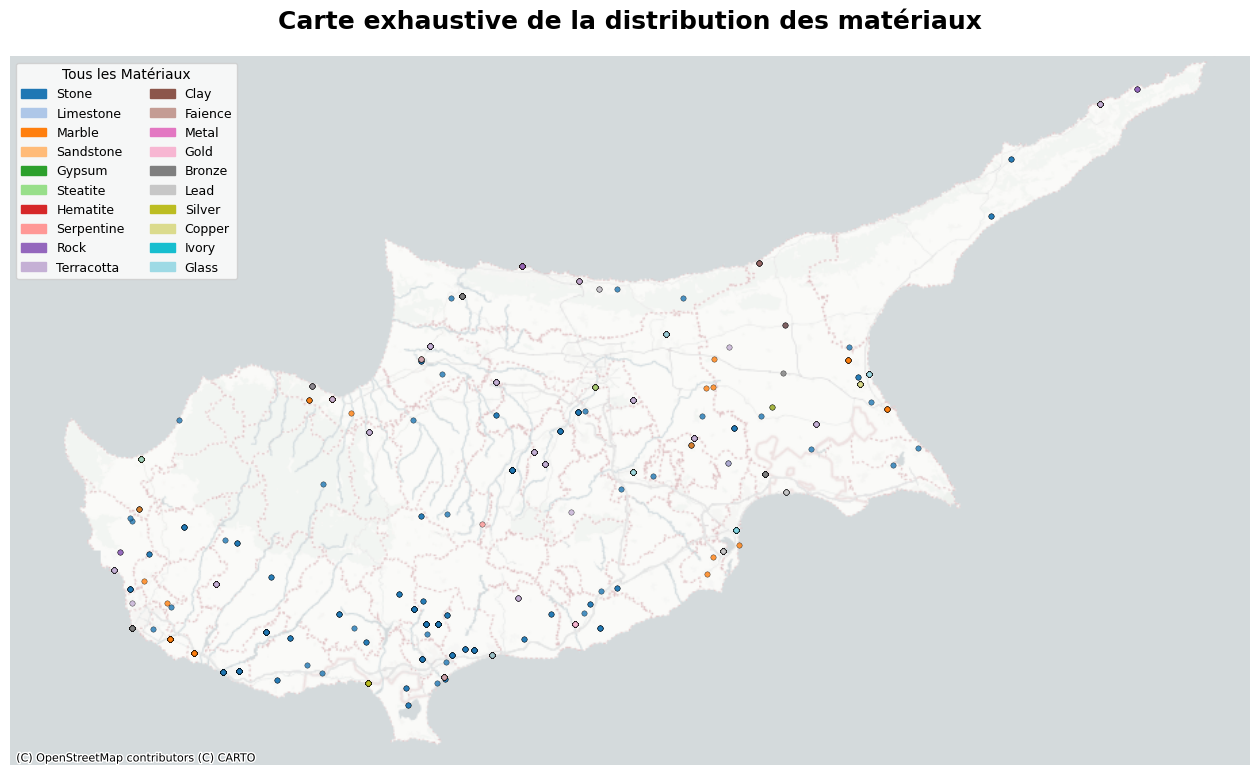

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as cx
import numpy as np
import matplotlib.cm as cm

tous_les_materiaux = [
    "stone", "limestone", "marble", "sandstone", "gypsum",
    "steatite", "hematite", "serpentine", "rock", "terracotta",
    "clay", "faience", "metal", "gold", "bronze", "lead",
    "silver", "copper", "ivory", "glass"
]

couleurs_liste = plt.get_cmap('tab20')(np.linspace(0, 1, len(tous_les_materiaux)))
mapping_couleurs = {mat: couleurs_liste[i] for i, mat in enumerate(tous_les_materiaux)}

def classifier_tous_materiaux(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat
    return None # Pour ignorer les supports (vase, cippus) qui n'auraient pas de matériau mentionné

gdf_complet = gdf_inscriptions_webmercator.copy()
gdf_complet['Mat_Final'] = gdf_complet['Material'].apply(classifier_tous_materiaux)

fig, ax = plt.subplots(figsize=(16, 14), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in tous_les_materiaux:
    subset = gdf_complet[gdf_complet['Mat_Final'] == mat]
    if not subset.empty:
        ax.scatter(
            subset.geometry.x,
            subset.geometry.y,
            color=mapping_couleurs[mat],
            s=15,
            alpha=0.8,
            edgecolors='black',
            linewidth=0.3,
            label=mat,
            zorder=2
        )


patches = [mpatches.Patch(color=mapping_couleurs[m], label=m.capitalize()) for m in tous_les_materiaux]
ax.legend(handles=patches, title="Tous les Matériaux", loc='upper left',
          frameon=True, fontsize=9, ncol=2)

ax.set_title("Carte exhaustive de la distribution des matériaux", fontsize=18, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

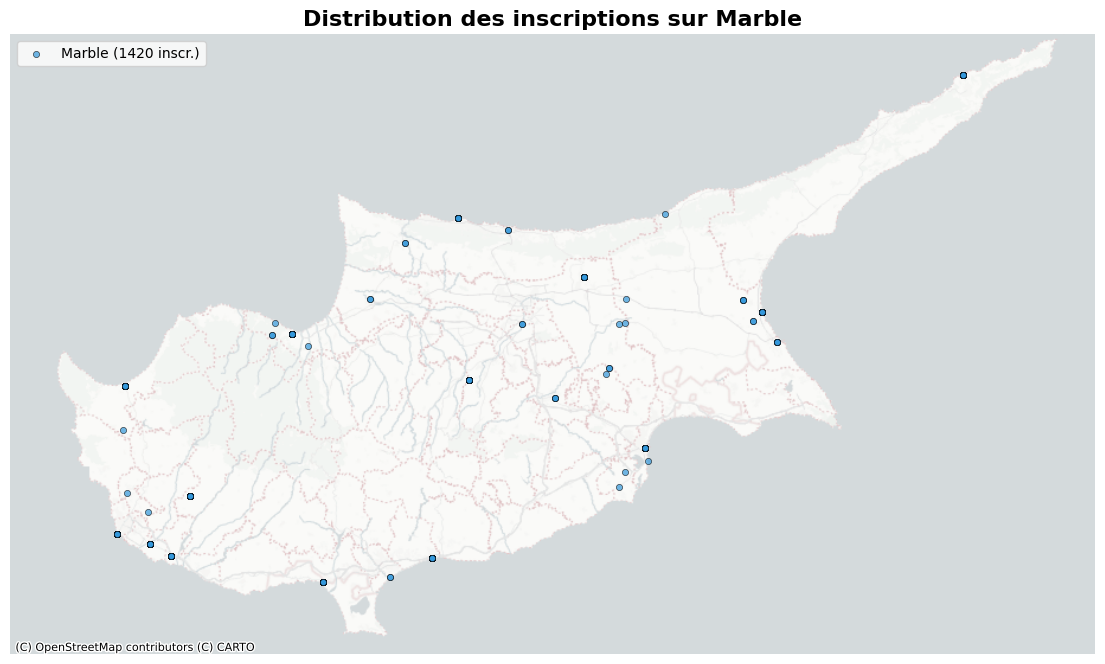

In [ ]:


materiau_cible = "marble"
couleur_point = "#3498db"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

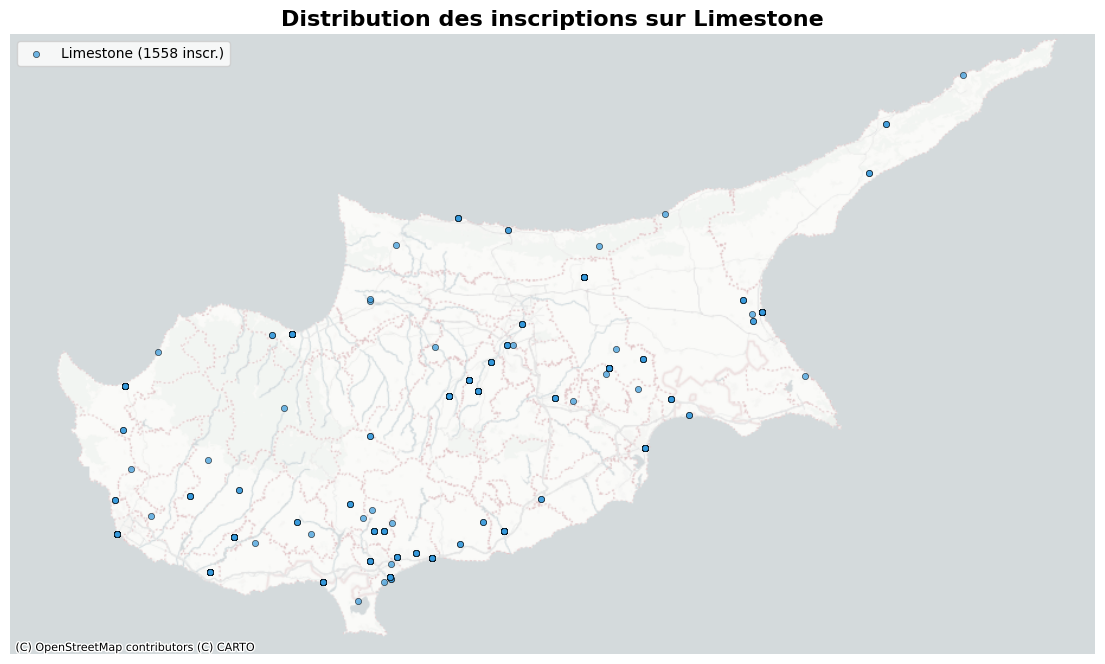

In [ ]:


materiau_cible = "limestone"
couleur_point = "#3498db"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

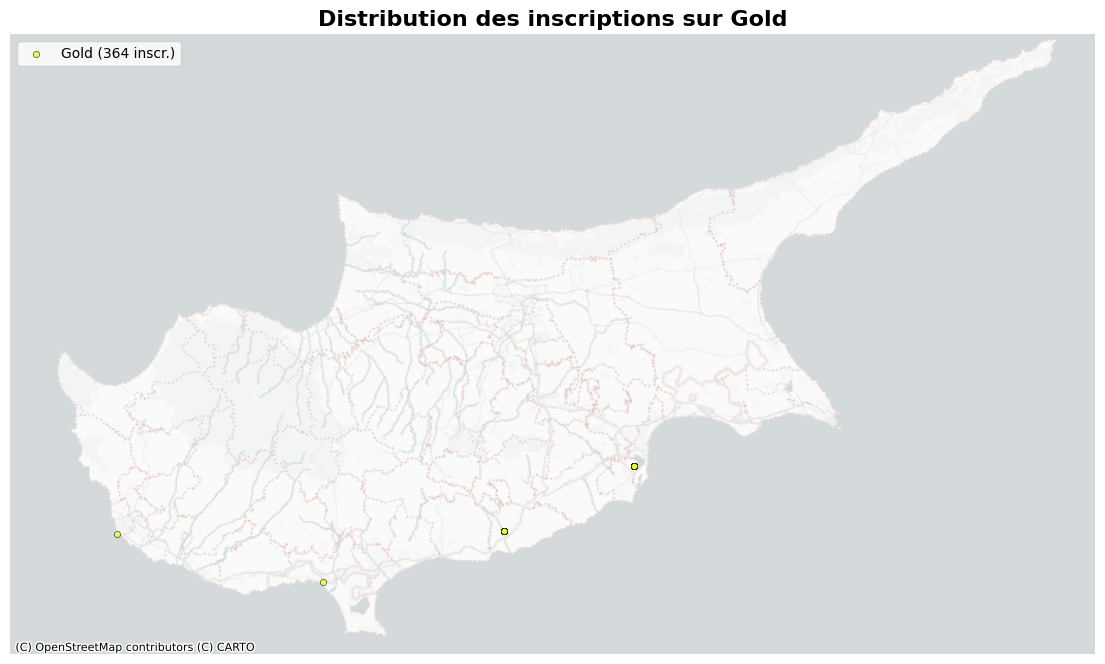

In [ ]:


materiau_cible = "gold"
couleur_point = "#edfc24"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

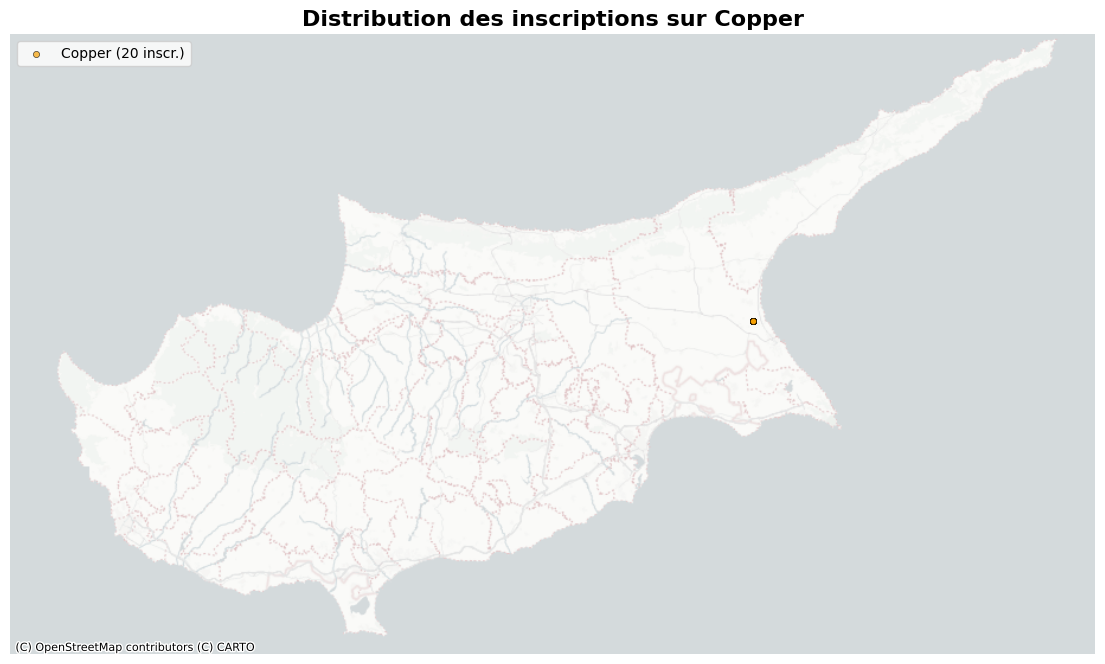

In [ ]:


materiau_cible = "copper"
couleur_point = "#f7a102"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

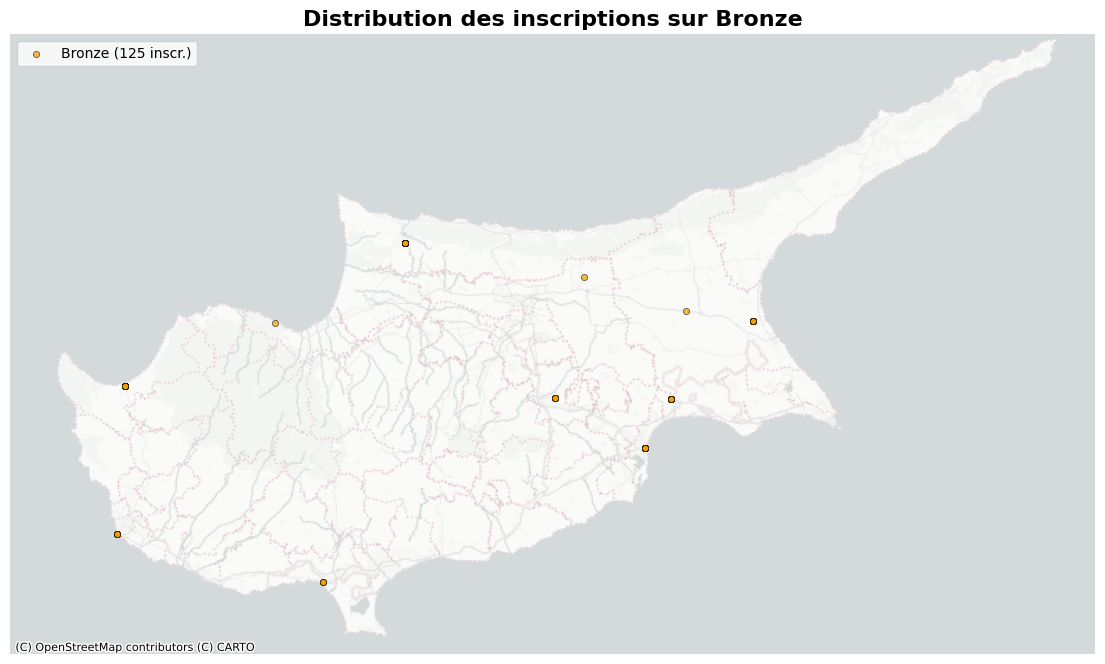

In [ ]:


materiau_cible = "bronze"
couleur_point = "#f39e02"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

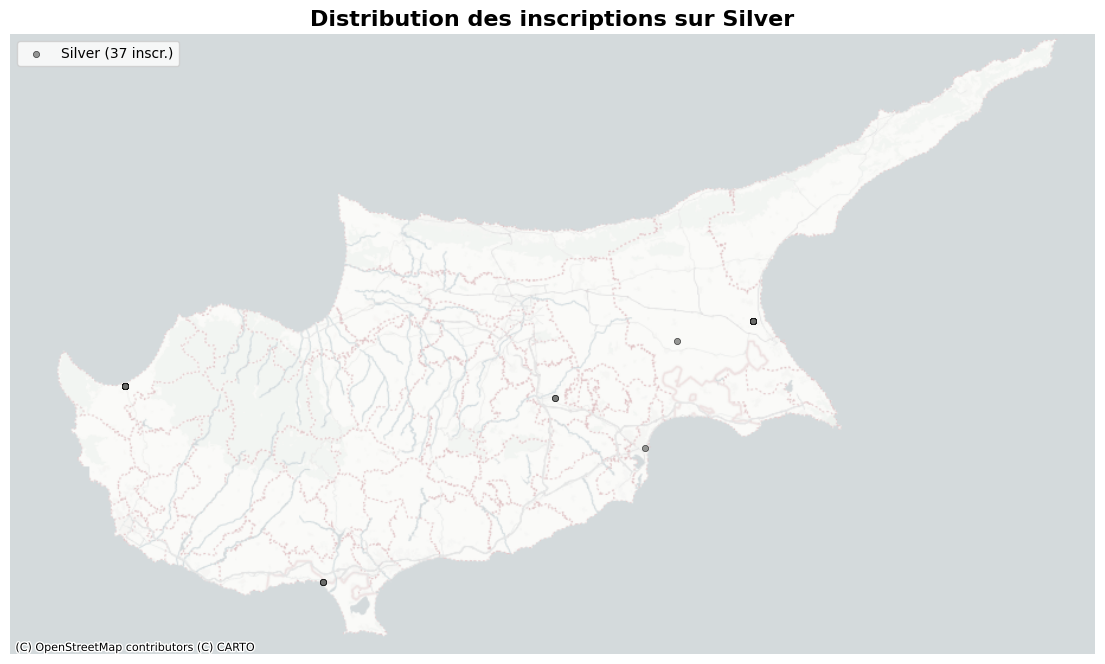

In [ ]:


materiau_cible = "silver"
couleur_point = "#6b6c6a"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

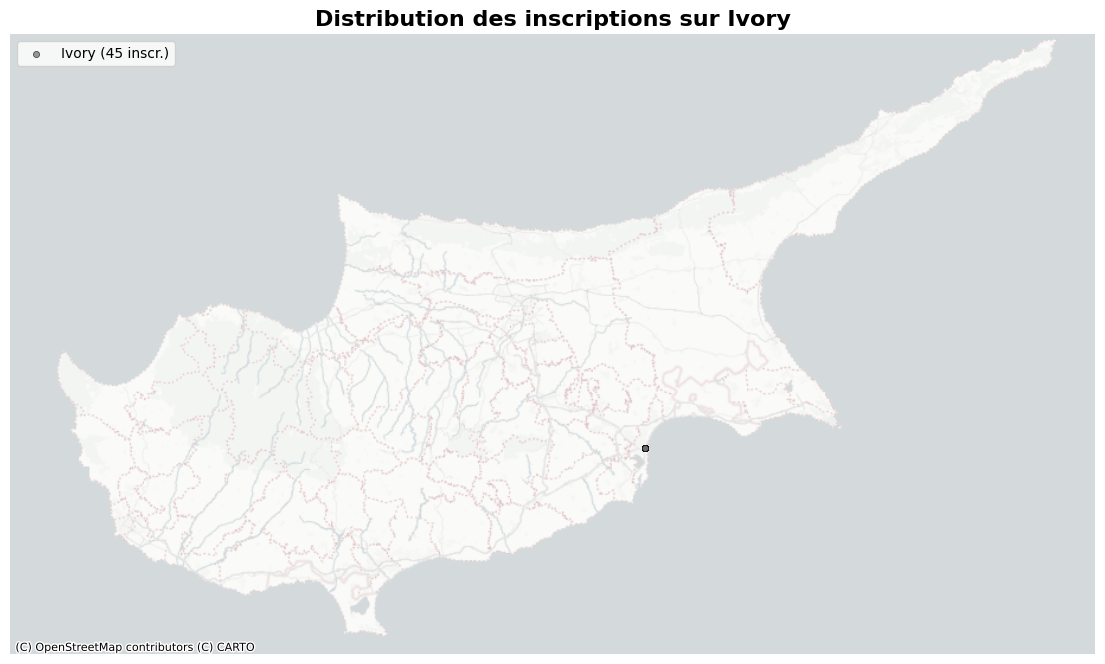

In [ ]:


materiau_cible = "ivory"
couleur_point = "#6b6c6a"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

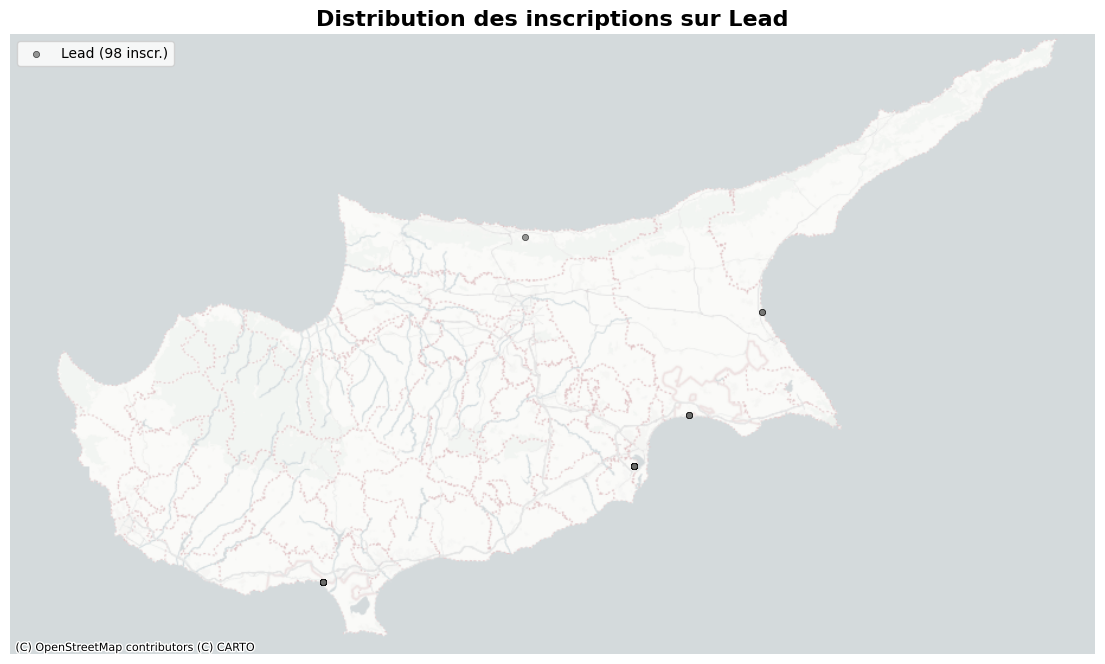

In [ ]:


materiau_cible = "lead"
couleur_point = "#6b6c6a"

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

mask = gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False)
subset = gdf_inscriptions_webmercator[mask]

if not subset.empty:
    ax.scatter(
        subset.geometry.x,
        subset.geometry.y,
        color=couleur_point,
        s=20,
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        zorder=2,
        label=f"{materiau_cible.capitalize()} ({len(subset)} inscr.)"
    )

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution des inscriptions sur {materiau_cible.capitalize()}", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

--------

Matériau et époque

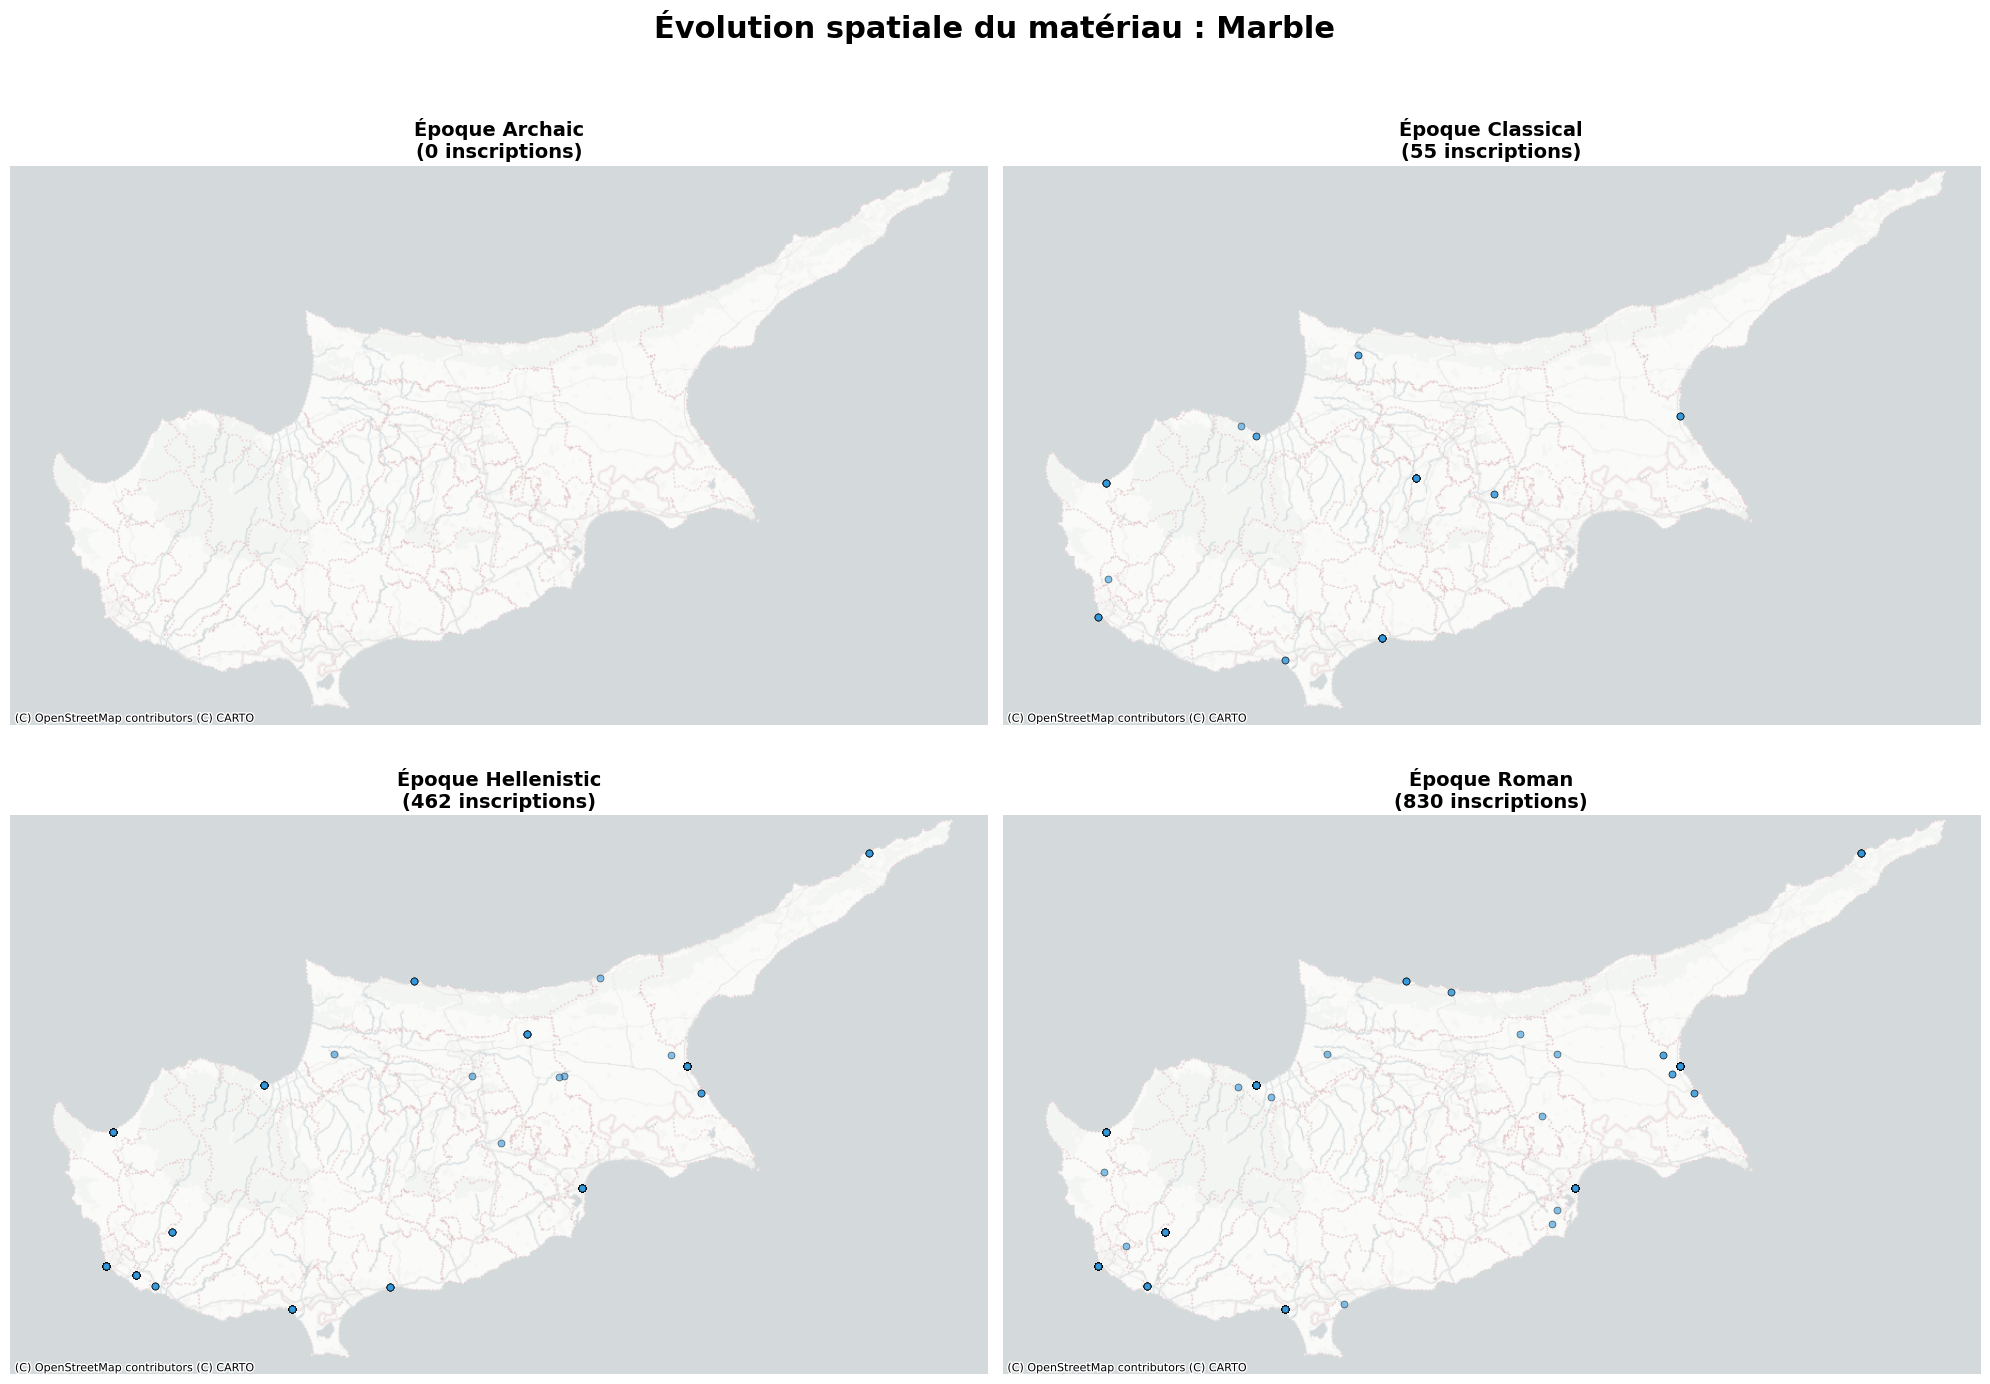

In [ ]:
import matplotlib.pyplot as plt
import contextily as cx
import numpy as np

materiau_cible = "marble"
couleur_point = "#3498db"
epoques = ['Archaic', 'Classical', 'Hellenistic', 'Roman']
# ------------------

fig, axes = plt.subplots(2, 2, figsize=(20, 16), facecolor='white')
axes = axes.flatten()

for i, epoque in enumerate(epoques):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_xlim(3580000, 3860000)
    ax.set_ylim(4100000, 4260000)

    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

    mask = (gdf_inscriptions_webmercator['Date'] == epoque) & \
           (gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False))

    subset = gdf_inscriptions_webmercator[mask]

    if not subset.empty:
        ax.scatter(
            subset.geometry.x,
            subset.geometry.y,
            color=couleur_point,
            s=25,
            alpha=0.6,
            edgecolors='black',
            linewidth=0.5,
            zorder=2
        )

    ax.set_title(f"Époque {epoque}\n({len(subset)} inscriptions)", fontsize=14, fontweight='bold')
    ax.set_axis_off()

plt.suptitle(f"Évolution spatiale du matériau : {materiau_cible.capitalize()}", fontsize=22, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

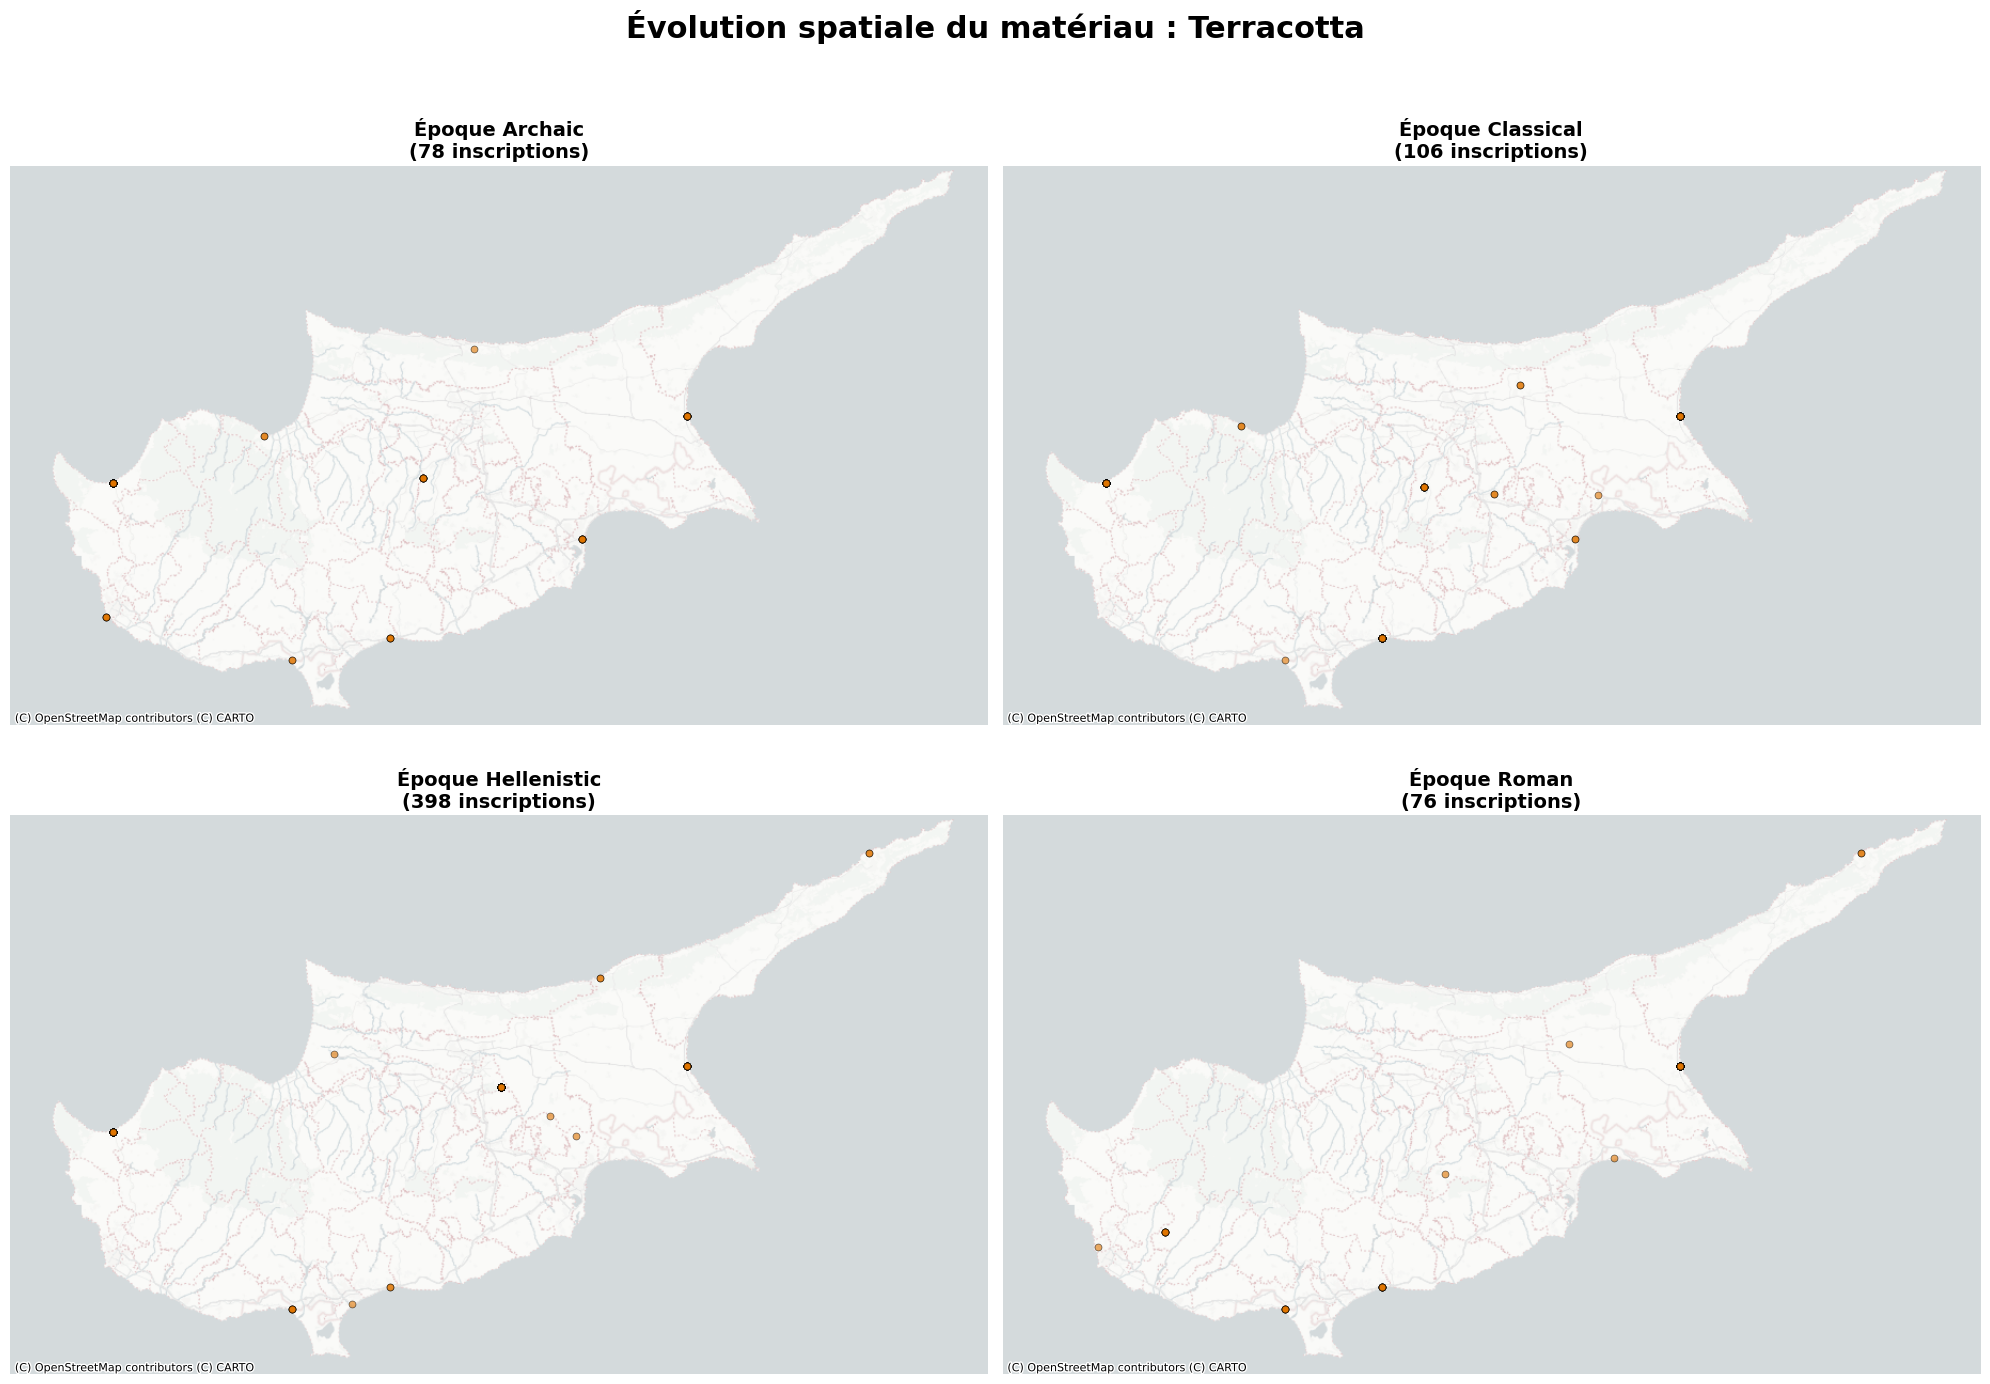

In [ ]:


materiau_cible = "terracotta"
couleur_point = "#e07500"
epoques = ['Archaic', 'Classical', 'Hellenistic', 'Roman']

fig, axes = plt.subplots(2, 2, figsize=(20, 16), facecolor='white')
axes = axes.flatten()

for i, epoque in enumerate(epoques):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_xlim(3580000, 3860000)
    ax.set_ylim(4100000, 4260000)

    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

    mask = (gdf_inscriptions_webmercator['Date'] == epoque) & \
           (gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False))

    subset = gdf_inscriptions_webmercator[mask]

    if not subset.empty:
        ax.scatter(
            subset.geometry.x,
            subset.geometry.y,
            color=couleur_point,
            s=25,
            alpha=0.6,
            edgecolors='black',
            linewidth=0.5,
            zorder=2
        )

    ax.set_title(f"Époque {epoque}\n({len(subset)} inscriptions)", fontsize=14, fontweight='bold')
    ax.set_axis_off()

plt.suptitle(f"Évolution spatiale du matériau : {materiau_cible.capitalize()}", fontsize=22, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

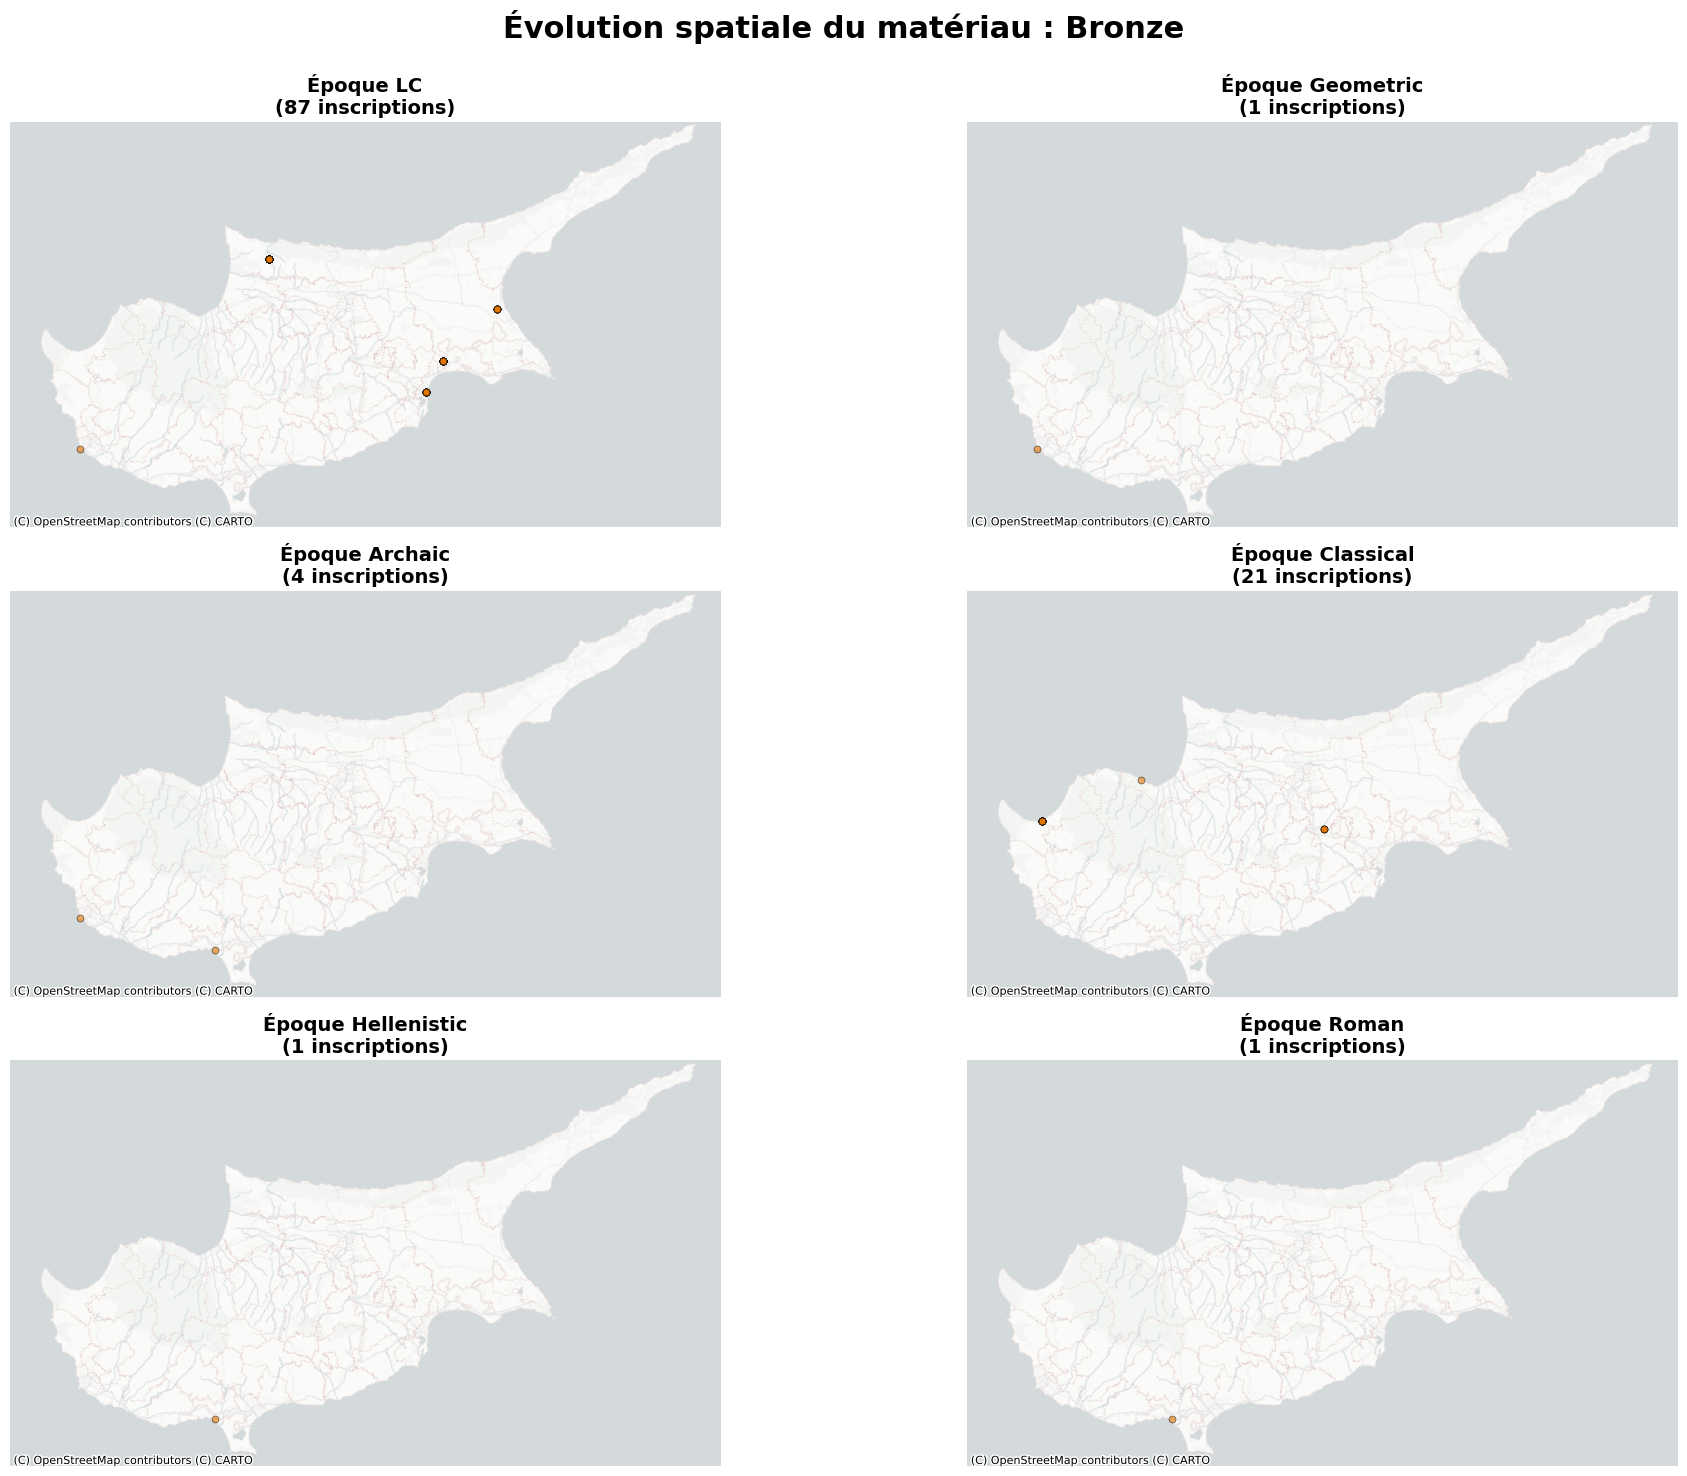

In [ ]:


materiau_cible = "bronze"
couleur_point = "#e07500"
epoques = ['LC', 'Geometric', 'Archaic', 'Classical', 'Hellenistic', 'Roman']

fig, axes = plt.subplots(3, 2, figsize=(20, 16), facecolor='white')
axes = axes.flatten()

for i, epoque in enumerate(epoques):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_xlim(3580000, 3860000)
    ax.set_ylim(4100000, 4260000)

    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

    mask = (gdf_inscriptions_webmercator['Date'] == epoque) & \
           (gdf_inscriptions_webmercator['Material'].str.contains(materiau_cible, case=False, na=False))

    subset = gdf_inscriptions_webmercator[mask]

    if not subset.empty:
        ax.scatter(
            subset.geometry.x,
            subset.geometry.y,
            color=couleur_point,
            s=25,
            alpha=0.6,
            edgecolors='black',
            linewidth=0.5,
            zorder=2
        )

    ax.set_title(f"Époque {epoque}\n({len(subset)} inscriptions)", fontsize=14, fontweight='bold')
    ax.set_axis_off()

plt.suptitle(f"Évolution spatiale du matériau : {materiau_cible.capitalize()}", fontsize=22, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

------------

Spécialisation par type de site

-----------

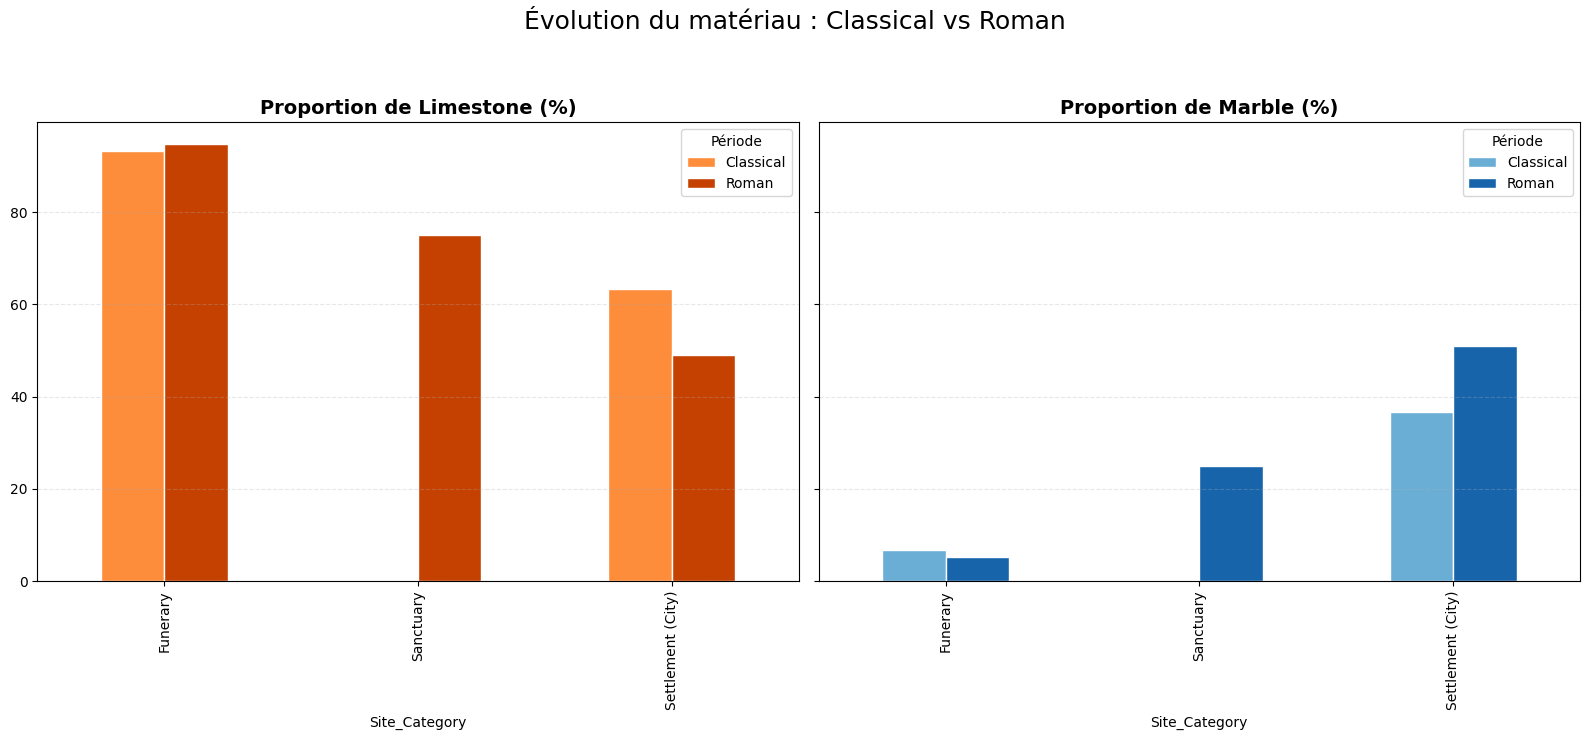

In [ ]:
import matplotlib.pyplot as plt

type_mapping = {
    'settlement': 'Settlement (City)',
    'sanctuary': 'Sanctuary',
    'cemetery': 'Funerary', 'necropolis': 'Funerary', 'tombs': 'Funerary'
}

df_sites_prep = gdf_settlement.rename(columns={'Type': 'Site_Type'})
df_merged = gdf_inscriptions.merge(df_sites_prep[['ID', 'Site_Type']], left_on='Settlement_ID', right_on='ID')
df_merged['Site_Category'] = df_merged['Site_Type'].map(type_mapping)

periodes = ['Classical', 'Roman']
df_filtered = df_merged[df_merged['Date'].isin(periodes)].copy()

def simplify(t):
    t = str(t).lower()
    if 'limestone' in t: return 'Limestone'
    if 'marble' in t: return 'Marble'
    return 'Other'

df_filtered['Mat_Simple'] = df_filtered['Material'].apply(simplify)

stats = df_filtered.groupby(['Date', 'Site_Category', 'Mat_Simple']).size().unstack(fill_value=0)
stats = stats[['Limestone', 'Marble']]
stats_perc = stats.div(stats.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
for i, mat in enumerate(['Limestone', 'Marble']):
    plot_data = stats_perc[mat].unstack(level=0)
    colors = [plt.cm.Oranges(0.5), plt.cm.Oranges(0.8)] if mat == 'Limestone' else [plt.cm.Blues(0.5), plt.cm.Blues(0.8)]
    plot_data.plot(kind='bar', ax=axes[i], color=colors, edgecolor='white')
    axes[i].set_title(f'Proportion de {mat} (%)', fontsize=14, fontweight='bold')
    axes[i].legend(title='Période')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle('Évolution du matériau : Classical vs Roman', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:

def simplify_material(text):
    t = str(text).lower()
    if 'limestone' in t: return 'Limestone (Calcaire)'
    if 'marble' in t: return 'Marble (Marbre)'
    if 'terracotta' in t or 'clay' in t: return 'Terracotta/Clay (Argile)'
    if 'gold' in t: return 'Gold (Or)'
    if 'stone' in t: return 'Stone (Pierre générique)'
    return 'Other'

gdf_inscriptions['Material_Clean'] = gdf_inscriptions['Material'].apply(simplify_material)

df_sites_prep = gdf_settlement[['ID', 'Type']].rename(columns={'Type': 'Site_Type'})
df_merged = gdf_inscriptions.merge(df_sites_prep, left_on='Settlement_ID', right_on='ID', how='inner')

counts = df_merged.groupby(['Site_Type', 'Material_Clean']).size().reset_index(name='count')
top_materials = counts.sort_values(['Site_Type', 'count'], ascending=[True, False]).drop_duplicates('Site_Type')

print(top_materials[['Site_Type', 'Material_Clean', 'count']])

     Site_Type            Material_Clean  count
5     cemetery  Terracotta/Clay (Argile)   2148
6       church      Limestone (Calcaire)     63
9   necropolis      Limestone (Calcaire)    168
12   sanctuary      Limestone (Calcaire)     64
22  settlement  Terracotta/Clay (Argile)  17081
23       tombs      Limestone (Calcaire)    238


In [ ]:

def simplify_material(text):
    t = str(text).lower()
    if 'limestone' in t: return 'Limestone (Calcaire)'
    if 'marble' in t: return 'Marble (Marbre)'
    if 'terracotta' in t or 'clay' in t: return 'Terracotta/Clay (Argile)'
    if 'gold' in t: return 'Gold (Or)'
    if 'bronze' in t: return 'Bronze'
    if 'stone' in t: return 'Stone (Pierre générique)'
    return 'Other/Mixed'

gdf_inscriptions['Material_Clean'] = gdf_inscriptions['Material'].apply(simplify_material)

df_sites_prep = gdf_settlement[['ID', 'Type']].rename(columns={'Type': 'Site_Type'})
df_merged = gdf_inscriptions.merge(df_sites_prep, left_on='Settlement_ID', right_on='ID', how='inner')

counts = df_merged.groupby(['Site_Type', 'Material_Clean']).size().reset_index(name='count')
top_3_per_site = counts.sort_values(['Site_Type', 'count'], ascending=[True, False]).groupby('Site_Type').head(3)

print(top_3_per_site.to_string(index=False))

 Site_Type           Material_Clean  count
  cemetery Terracotta/Clay (Argile)   2148
  cemetery              Other/Mixed    687
  cemetery Stone (Pierre générique)    575
    church     Limestone (Calcaire)     63
    church          Marble (Marbre)     28
    church              Other/Mixed     21
necropolis     Limestone (Calcaire)    168
necropolis Stone (Pierre générique)     24
necropolis Terracotta/Clay (Argile)     24
 sanctuary     Limestone (Calcaire)     64
 sanctuary Stone (Pierre générique)     32
 sanctuary          Marble (Marbre)     16
settlement Terracotta/Clay (Argile)  17081
settlement Stone (Pierre générique)  14638
settlement          Marble (Marbre)  10800
     tombs     Limestone (Calcaire)    238
     tombs Stone (Pierre générique)    168
     tombs Terracotta/Clay (Argile)     98


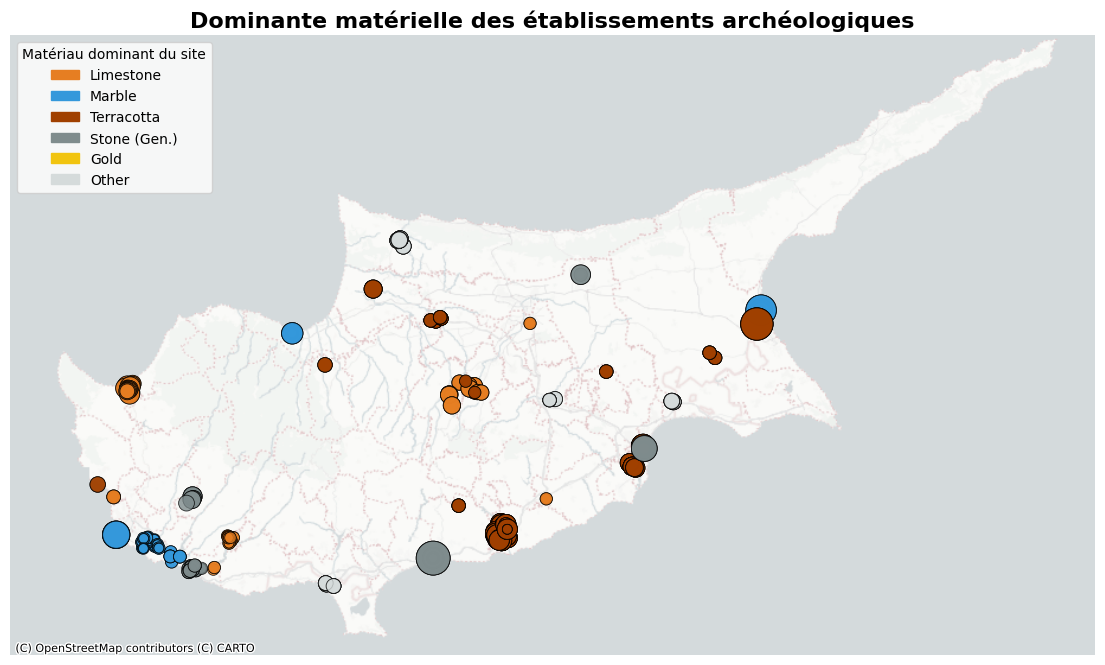

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as cx
import numpy as np
from shapely import wkt


df_sites = pd.read_csv('gdf_settlement_ecriture.csv')
df_inscr = pd.read_csv('gdf_inscriptions_chypre.csv')

df_sites['geometry'] = df_sites['geometry'].apply(wkt.loads)
gdf_sites = gpd.GeoDataFrame(df_sites, crs='EPSG:4326').to_crs(epsg=3857)

def simplifier_mat(text):
    t = str(text).lower()
    if 'limestone' in t: return 'Limestone'
    if 'marble' in t: return 'Marble'
    if 'terracotta' in t or 'clay' in t: return 'Terracotta'
    if 'gold' in t: return 'Gold'
    if 'stone' in t: return 'Stone (Gen.)'
    return 'Other'

df_inscr['Mat_Clean'] = df_inscr['Material'].apply(simplifier_mat)

mode_mat = (df_inscr.groupby(['Settlement_ID', 'Mat_Clean'])
            .size()
            .reset_index(name='count')
            .sort_values(['Settlement_ID', 'count'], ascending=[True, False])
            .drop_duplicates('Settlement_ID'))


mode_mat = mode_mat.rename(columns={'Mat_Clean': 'Dominant_Material'})
gdf_final = gdf_sites.merge(mode_mat[['Settlement_ID', 'Dominant_Material']],
                            left_on='ID', right_on='Settlement_ID', how='inner')

mapping_couleurs = {
    'Limestone': '#e67e22',   # Orange
    'Marble': '#3498db',      # Bleu
    'Terracotta': '#a04000',  # Brun
    'Stone (Gen.)': '#7f8c8d', # Gris
    'Gold': '#f1c40f',        # Jaune
    'Other': '#d5dbdb'        # Gris clair
}

fig, ax = plt.subplots(figsize=(14, 12), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat, couleur in mapping_couleurs.items():
    subset = gdf_final[gdf_final['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Num_Inscriptions']) * 20)

        ax.scatter(
            subset.geometry.x, subset.geometry.y,
            color=couleur, s=m_sizes, alpha=0.8,
            edgecolors='black', linewidth=0.6, label=mat, zorder=3
        )

patches = [mpatches.Patch(color=c, label=l) for l, c in mapping_couleurs.items()]
ax.legend(handles=patches, title="Matériau dominant du site", loc='upper left', frameon=True)

ax.set_title("Dominante matérielle des établissements archéologiques", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

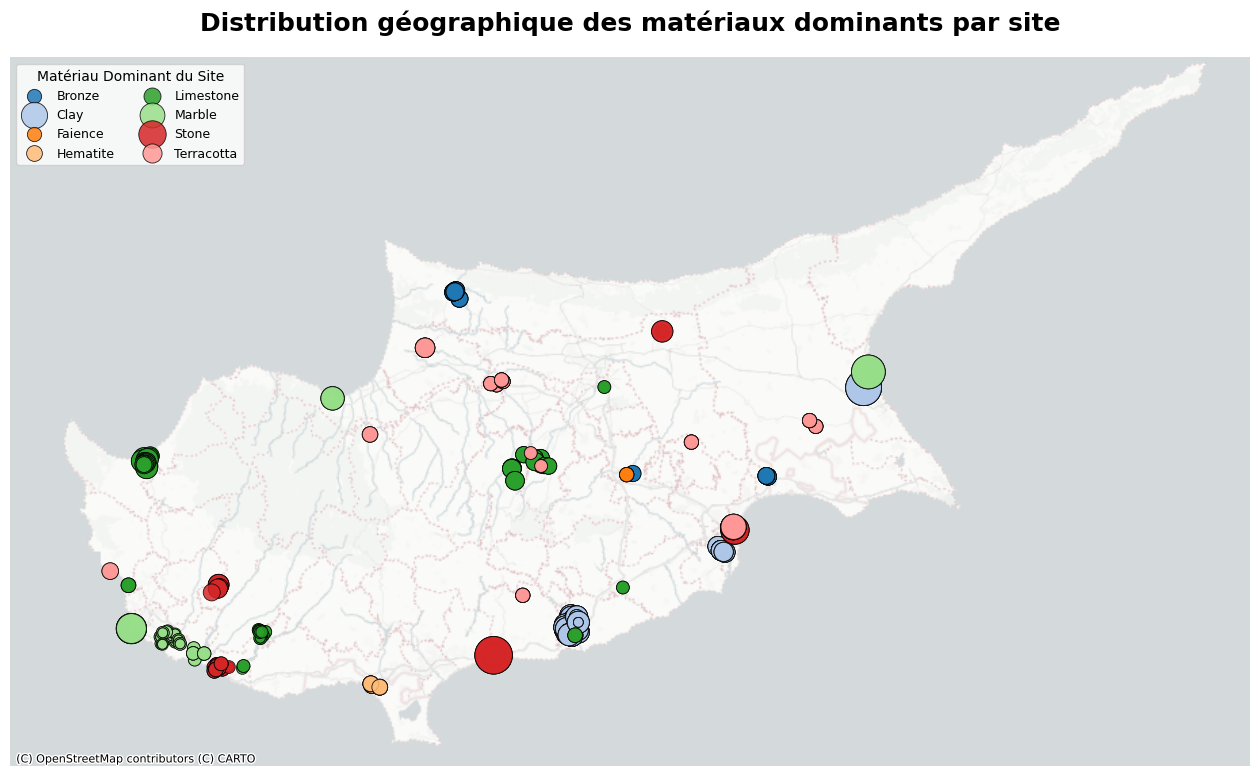

In [ ]:


if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "limestone", "marble", "terracotta", "clay", "stone",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)
df_valides = gdf_inscriptions_webmercator.dropna(subset=['Mat_Substance'])


mode_exhaustif = (df_valides.groupby(['Settlement_ID', 'Mat_Substance'])
                  .size()
                  .reset_index(name='count')
                  .sort_values(['Settlement_ID', 'count'], ascending=[True, False])
                  .drop_duplicates('Settlement_ID'))

mode_exhaustif = mode_exhaustif.rename(columns={'Mat_Substance': 'Dominant_Material'})


gdf_map = gdf_settlement.to_crs(epsg=3857).merge(
    mode_exhaustif[['Settlement_ID', 'Dominant_Material']],
    left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 14), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map[gdf_map['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Num_Inscriptions']) * 25)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes,
            alpha=0.85,
            edgecolors='black',
            linewidth=0.6,
            label=mat,
            zorder=3
        )

ax.legend(title="Matériau Dominant du Site", loc='upper left',
          frameon=True, ncol=2, fontsize=9)

ax.set_title("Distribution géographique des matériaux dominants par site",
             fontsize=18, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

Afficher matériaux de prestige uniquement (on enlève terracotta, limestone et stone)

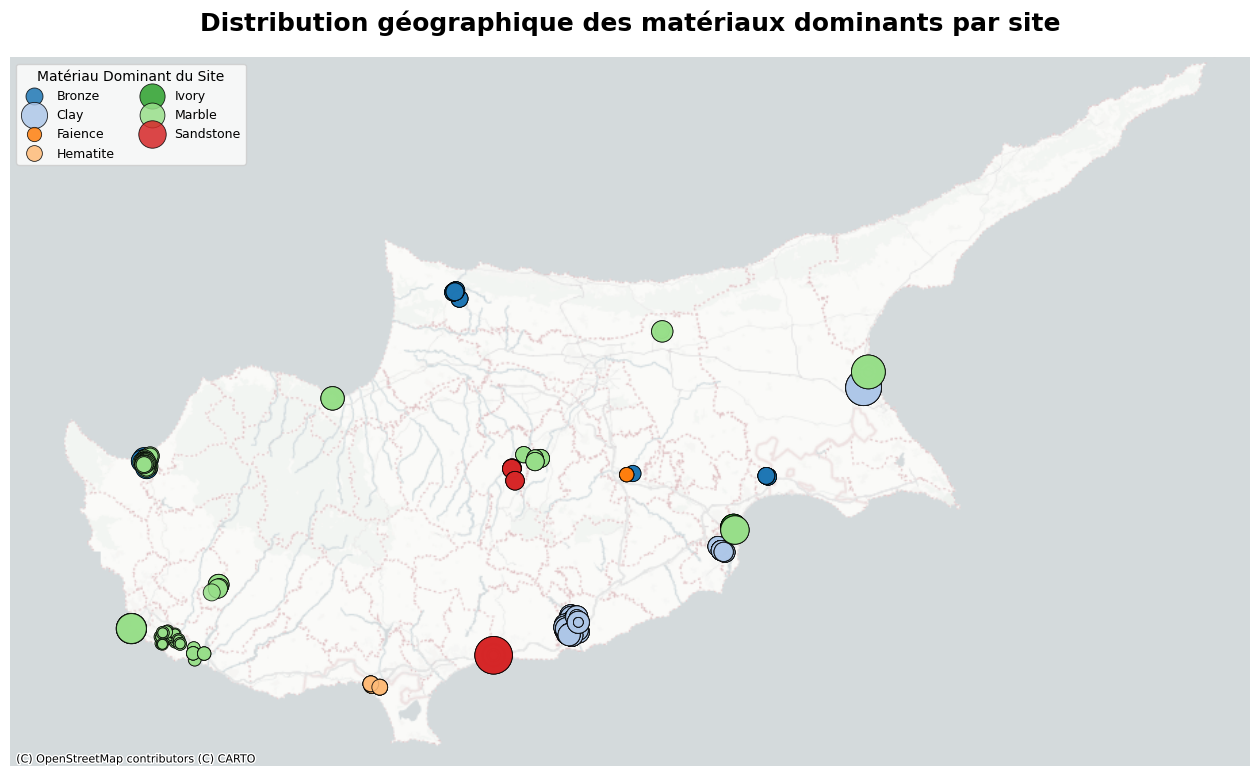

In [ ]:


if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "marble", "clay",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)
df_valides = gdf_inscriptions_webmercator.dropna(subset=['Mat_Substance'])


mode_exhaustif = (df_valides.groupby(['Settlement_ID', 'Mat_Substance'])
                  .size()
                  .reset_index(name='count')
                  .sort_values(['Settlement_ID', 'count'], ascending=[True, False])
                  .drop_duplicates('Settlement_ID'))

mode_exhaustif = mode_exhaustif.rename(columns={'Mat_Substance': 'Dominant_Material'})


gdf_map = gdf_settlement.to_crs(epsg=3857).merge(
    mode_exhaustif[['Settlement_ID', 'Dominant_Material']],
    left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 14), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map[gdf_map['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Num_Inscriptions']) * 25)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes,
            alpha=0.85,
            edgecolors='black',
            linewidth=0.6,
            label=mat,
            zorder=3
        )

ax.legend(title="Matériau Dominant du Site", loc='upper left',
          frameon=True, ncol=2, fontsize=9)

ax.set_title("Distribution géographique des matériaux dominants par site",
             fontsize=18, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

---------

Matériaux plus fréquents par site, par époque

----------

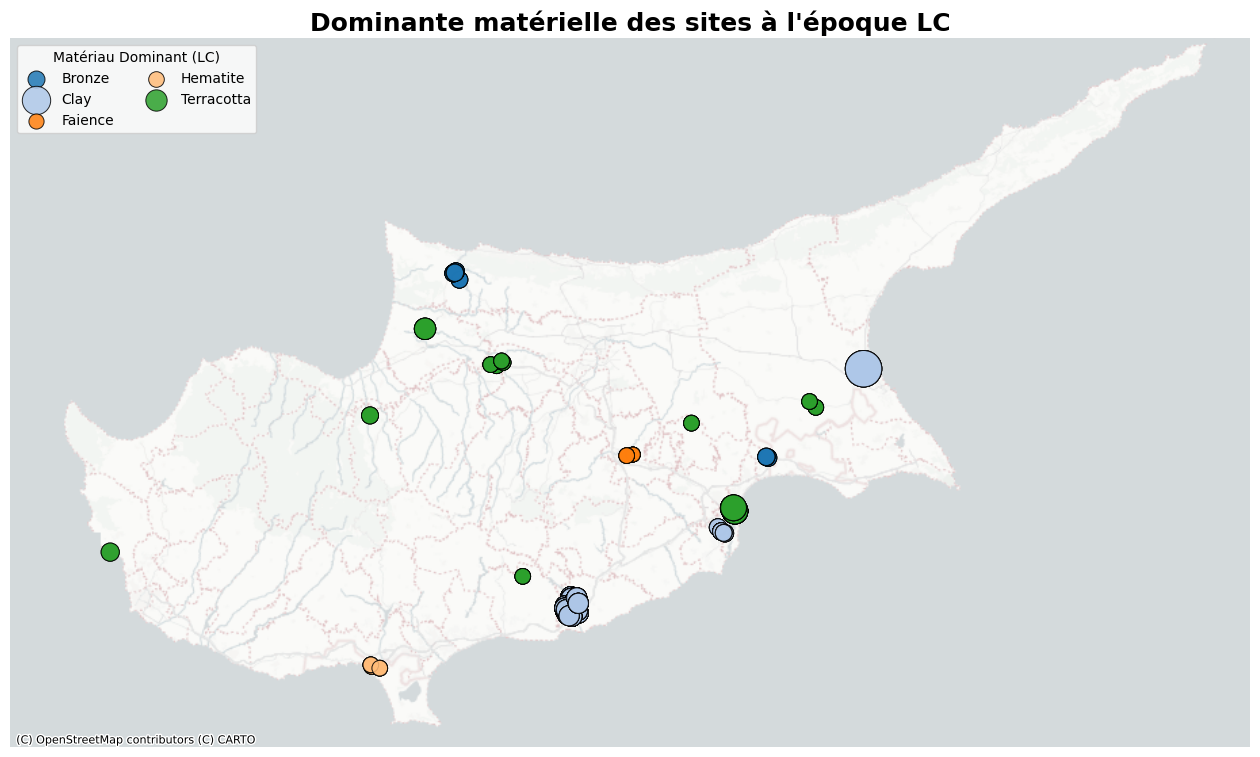

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as cx
import numpy as np
from shapely import wkt

if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "limestone", "marble", "terracotta", "clay", "stone",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

epoque_analyse = 'LC'

df_epoque = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == epoque_analyse) &
    (gdf_inscriptions_webmercator['Mat_Substance'].notna())
].copy()

mode_epoque = (df_epoque.groupby(['Settlement_ID', 'Mat_Substance'])
               .size()
               .reset_index(name='count_inscr')
               .sort_values(['Settlement_ID', 'count_inscr'], ascending=[True, False])
               .drop_duplicates('Settlement_ID'))

mode_epoque = mode_epoque.rename(columns={'Mat_Substance': 'Dominant_Material'})

gdf_map_epoque = gdf_settlement.to_crs(epsg=3857).merge(
    mode_epoque, left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map_epoque['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 12), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map_epoque[gdf_map_epoque['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 60 + (np.sqrt(subset['count_inscr']) * 30)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes, alpha=0.85, edgecolors='black', linewidth=0.7,
            label=f"{mat}", zorder=3
        )

ax.legend(title=f"Matériau Dominant ({epoque_analyse})", loc='upper left', frameon=True, ncol=2)
ax.set_title(f"Dominante matérielle des sites à l'époque {epoque_analyse}", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.show()

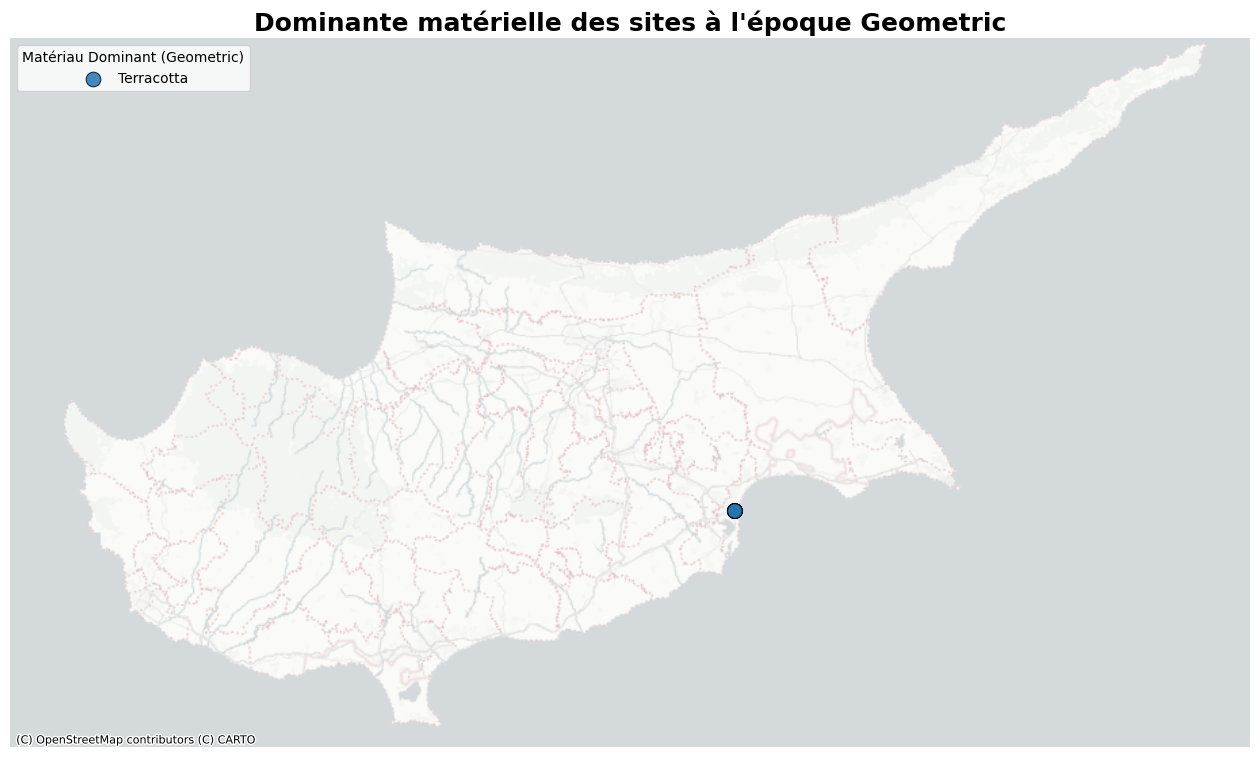

In [ ]:


if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "limestone", "marble", "terracotta", "clay", "stone",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

epoque_analyse = 'Geometric'

df_epoque = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == epoque_analyse) &
    (gdf_inscriptions_webmercator['Mat_Substance'].notna())
].copy()

mode_epoque = (df_epoque.groupby(['Settlement_ID', 'Mat_Substance'])
               .size()
               .reset_index(name='count_inscr')
               .sort_values(['Settlement_ID', 'count_inscr'], ascending=[True, False])
               .drop_duplicates('Settlement_ID'))

mode_epoque = mode_epoque.rename(columns={'Mat_Substance': 'Dominant_Material'})

gdf_map_epoque = gdf_settlement.to_crs(epsg=3857).merge(
    mode_epoque, left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map_epoque['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 12), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map_epoque[gdf_map_epoque['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 60 + (np.sqrt(subset['count_inscr']) * 30)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes, alpha=0.85, edgecolors='black', linewidth=0.7,
            label=f"{mat}", zorder=3
        )

ax.legend(title=f"Matériau Dominant ({epoque_analyse})", loc='upper left', frameon=True, ncol=2)
ax.set_title(f"Dominante matérielle des sites à l'époque {epoque_analyse}", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.show()

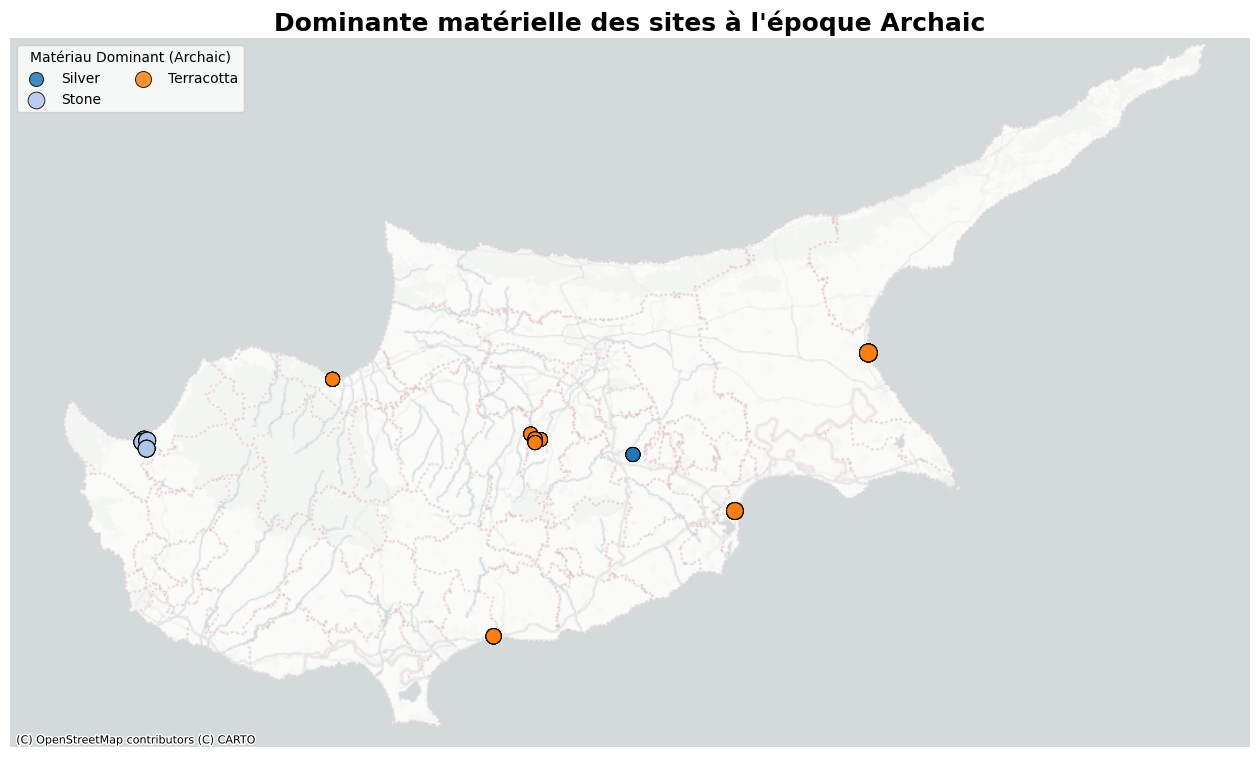

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as cx
import numpy as np
from shapely import wkt

if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "limestone", "marble", "terracotta", "clay", "stone",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

epoque_analyse = 'Archaic'

df_epoque = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == epoque_analyse) &
    (gdf_inscriptions_webmercator['Mat_Substance'].notna())
].copy()

mode_epoque = (df_epoque.groupby(['Settlement_ID', 'Mat_Substance'])
               .size()
               .reset_index(name='count_inscr')
               .sort_values(['Settlement_ID', 'count_inscr'], ascending=[True, False])
               .drop_duplicates('Settlement_ID'))

mode_epoque = mode_epoque.rename(columns={'Mat_Substance': 'Dominant_Material'})

gdf_map_epoque = gdf_settlement.to_crs(epsg=3857).merge(
    mode_epoque, left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map_epoque['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 12), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map_epoque[gdf_map_epoque['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 60 + (np.sqrt(subset['count_inscr']) * 30)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes, alpha=0.85, edgecolors='black', linewidth=0.7,
            label=f"{mat}", zorder=3
        )

ax.legend(title=f"Matériau Dominant ({epoque_analyse})", loc='upper left', frameon=True, ncol=2)
ax.set_title(f"Dominante matérielle des sites à l'époque {epoque_analyse}", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.show()

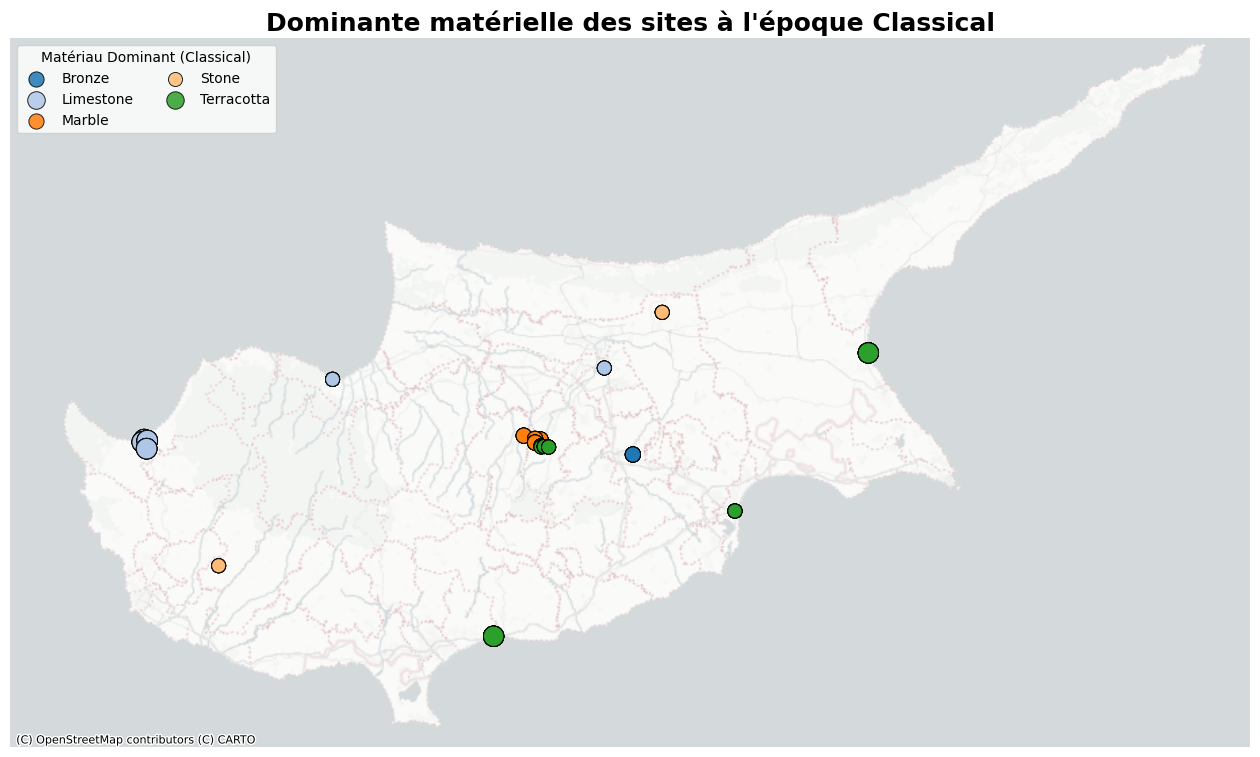

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as cx
import numpy as np
from shapely import wkt

if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "limestone", "marble", "terracotta", "clay", "stone",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

epoque_analyse = 'Classical'

df_epoque = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == epoque_analyse) &
    (gdf_inscriptions_webmercator['Mat_Substance'].notna())
].copy()

mode_epoque = (df_epoque.groupby(['Settlement_ID', 'Mat_Substance'])
               .size()
               .reset_index(name='count_inscr')
               .sort_values(['Settlement_ID', 'count_inscr'], ascending=[True, False])
               .drop_duplicates('Settlement_ID'))

mode_epoque = mode_epoque.rename(columns={'Mat_Substance': 'Dominant_Material'})

gdf_map_epoque = gdf_settlement.to_crs(epsg=3857).merge(
    mode_epoque, left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map_epoque['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 12), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map_epoque[gdf_map_epoque['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 60 + (np.sqrt(subset['count_inscr']) * 30)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes, alpha=0.85, edgecolors='black', linewidth=0.7,
            label=f"{mat}", zorder=3
        )

ax.legend(title=f"Matériau Dominant ({epoque_analyse})", loc='upper left', frameon=True, ncol=2)
ax.set_title(f"Dominante matérielle des sites à l'époque {epoque_analyse}", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.show()

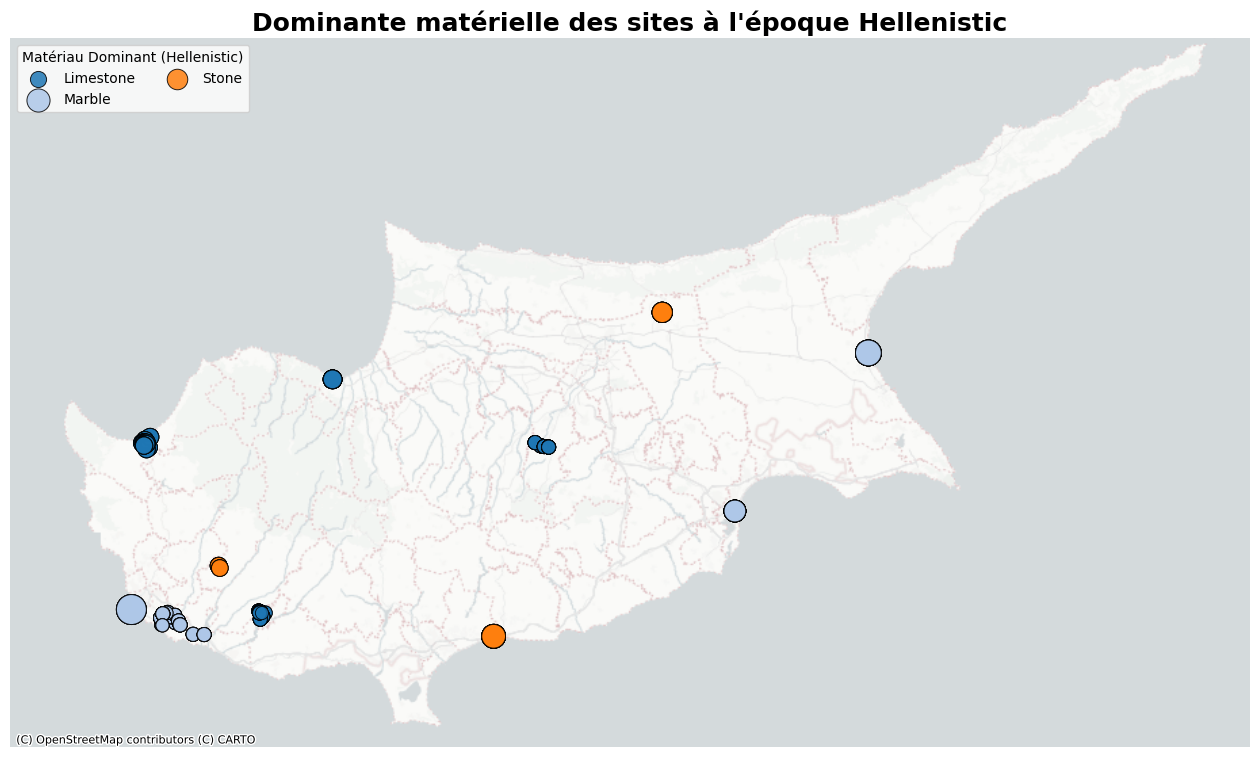

In [ ]:


if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "limestone", "marble", "terracotta", "clay", "stone",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

epoque_analyse = 'Hellenistic'

df_epoque = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == epoque_analyse) &
    (gdf_inscriptions_webmercator['Mat_Substance'].notna())
].copy()

mode_epoque = (df_epoque.groupby(['Settlement_ID', 'Mat_Substance'])
               .size()
               .reset_index(name='count_inscr')
               .sort_values(['Settlement_ID', 'count_inscr'], ascending=[True, False])
               .drop_duplicates('Settlement_ID'))

mode_epoque = mode_epoque.rename(columns={'Mat_Substance': 'Dominant_Material'})

gdf_map_epoque = gdf_settlement.to_crs(epsg=3857).merge(
    mode_epoque, left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map_epoque['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 12), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map_epoque[gdf_map_epoque['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 60 + (np.sqrt(subset['count_inscr']) * 30)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes, alpha=0.85, edgecolors='black', linewidth=0.7,
            label=f"{mat}", zorder=3
        )

ax.legend(title=f"Matériau Dominant ({epoque_analyse})", loc='upper left', frameon=True, ncol=2)
ax.set_title(f"Dominante matérielle des sites à l'époque {epoque_analyse}", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.show()

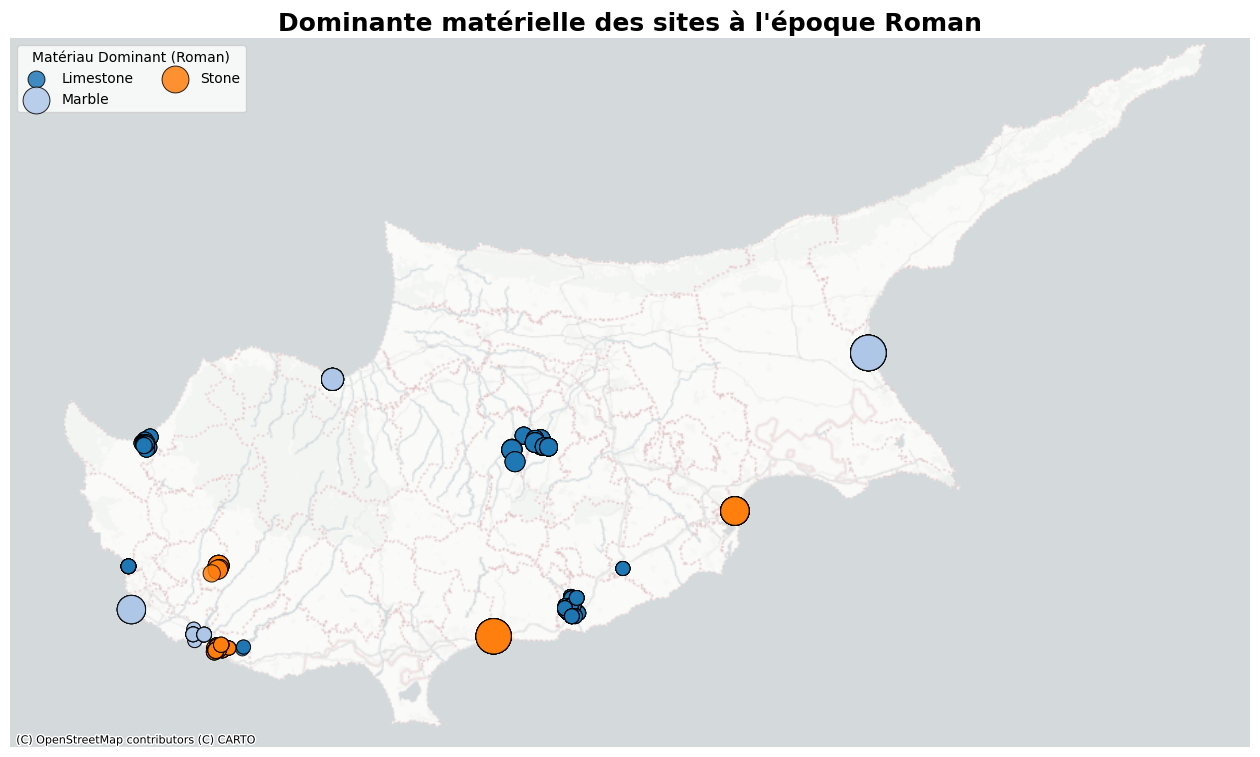

In [ ]:


if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if 'geometry' in gdf_settlement.columns:
        if gdf_settlement['geometry'].dtype == object:
            gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

tous_les_materiaux = [
    "limestone", "marble", "terracotta", "clay", "stone",
    "sandstone", "gypsum", "steatite", "hematite", "serpentine",
    "rock", "faience", "gold", "bronze", "lead", "silver",
    "copper", "iron", "metal", "ivory", "glass"
]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return None

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

epoque_analyse = 'Roman'

df_epoque = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == epoque_analyse) &
    (gdf_inscriptions_webmercator['Mat_Substance'].notna())
].copy()

mode_epoque = (df_epoque.groupby(['Settlement_ID', 'Mat_Substance'])
               .size()
               .reset_index(name='count_inscr')
               .sort_values(['Settlement_ID', 'count_inscr'], ascending=[True, False])
               .drop_duplicates('Settlement_ID'))

mode_epoque = mode_epoque.rename(columns={'Mat_Substance': 'Dominant_Material'})

gdf_map_epoque = gdf_settlement.to_crs(epsg=3857).merge(
    mode_epoque, left_on='ID', right_on='Settlement_ID', how='inner'
)

materiaux_presents = sorted(gdf_map_epoque['Dominant_Material'].unique())
colormap = plt.get_cmap('tab20')
mapping_couleurs = {mat: colormap(i % 20) for i, mat in enumerate(materiaux_presents)}

fig, ax = plt.subplots(figsize=(16, 12), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

for mat in materiaux_presents:
    subset = gdf_map_epoque[gdf_map_epoque['Dominant_Material'] == mat]
    if not subset.empty:
        m_sizes = 60 + (np.sqrt(subset['count_inscr']) * 30)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=m_sizes, alpha=0.85, edgecolors='black', linewidth=0.7,
            label=f"{mat}", zorder=3
        )

ax.legend(title=f"Matériau Dominant ({epoque_analyse})", loc='upper left', frameon=True, ncol=2)
ax.set_title(f"Dominante matérielle des sites à l'époque {epoque_analyse}", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.show()

---------

Par type de site, coloré par matériau majoritaire

In [ ]:
types_etablissements = gdf_settlement['Type'].value_counts()

print("--- Liste de tous les types d'établissements ---")
print(types_etablissements)

liste_types = gdf_settlement['Type'].unique().tolist()
print("\nListe brute :", liste_types)

--- Liste de tous les types d'établissements ---
Type
settlement    3380
cemetery       488
necropolis     167
sanctuary       73
tombs           13
monastery       12
church          10
Name: count, dtype: int64

Liste brute : ['settlement', 'cemetery', 'necropolis', 'sanctuary', 'church', 'tombs', 'monastery']


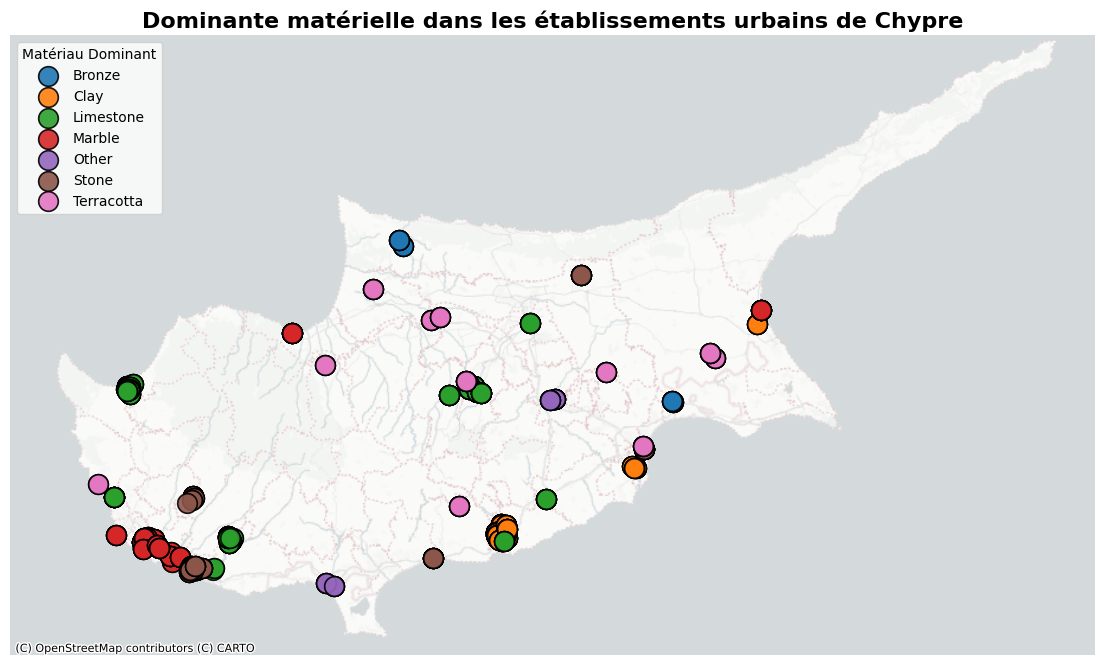

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as cx
import numpy as np
from shapely import wkt

if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if gdf_settlement['geometry'].dtype == object:
        gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
    gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

gdf_sanctuaries = gdf_settlement[gdf_settlement['Type'].str.lower() == 'settlement'].to_crs(epsg=3857)

tous_les_materiaux = ["limestone", "marble", "terracotta", "clay", "stone", "gold", "bronze", "lead"]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return "Other"

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

mode_mat = (gdf_inscriptions_webmercator.groupby(['Settlement_ID', 'Mat_Substance'])
            .size()
            .reset_index(name='count')
            .sort_values(['Settlement_ID', 'count'], ascending=[True, False])
            .drop_duplicates('Settlement_ID'))

gdf_map_sanct = gdf_sanctuaries.merge(
    mode_mat[['Settlement_ID', 'Mat_Substance']],
    left_on='ID', right_on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

try:
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)
except Exception as e:
    print(f"Erreur de chargement du fond de carte : {e}")
    ax.set_facecolor('#e0e0e0')

materiaux_presents = sorted(gdf_map_sanct['Mat_Substance'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {mat: colormap(i) for i, mat in enumerate(materiaux_presents)}

for mat in materiaux_presents:
    subset = gdf_map_sanct[gdf_map_sanct['Mat_Substance'] == mat]
    if not subset.empty:
        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=200,
            alpha=0.9,
            edgecolors='black',
            linewidth=1.2,
            label=mat,
            zorder=3
        )

ax.legend(title="Matériau Dominant", loc='upper left', frameon=True, fontsize=10)
ax.set_title("Dominante matérielle dans les établissements urbains de Chypre", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

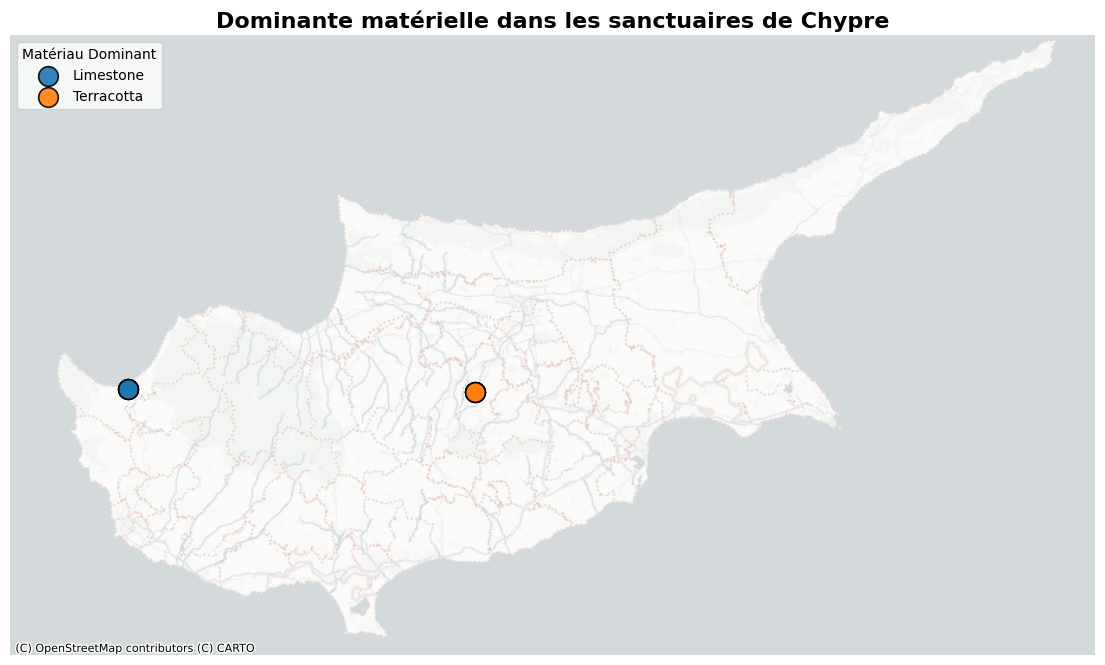

In [ ]:

if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if gdf_settlement['geometry'].dtype == object:
        gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
    gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

gdf_sanctuaries = gdf_settlement[gdf_settlement['Type'].str.lower() == 'sanctuary'].to_crs(epsg=3857)

tous_les_materiaux = ["limestone", "marble", "terracotta", "clay", "stone", "gold", "bronze", "lead"]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return "Other"

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

mode_mat = (gdf_inscriptions_webmercator.groupby(['Settlement_ID', 'Mat_Substance'])
            .size()
            .reset_index(name='count')
            .sort_values(['Settlement_ID', 'count'], ascending=[True, False])
            .drop_duplicates('Settlement_ID'))

gdf_map_sanct = gdf_sanctuaries.merge(
    mode_mat[['Settlement_ID', 'Mat_Substance']],
    left_on='ID', right_on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

try:
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)
except Exception as e:
    print(f"Erreur de chargement du fond de carte : {e}")
    ax.set_facecolor('#e0e0e0')

materiaux_presents = sorted(gdf_map_sanct['Mat_Substance'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {mat: colormap(i) for i, mat in enumerate(materiaux_presents)}

for mat in materiaux_presents:
    subset = gdf_map_sanct[gdf_map_sanct['Mat_Substance'] == mat]
    if not subset.empty:
        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=200,
            alpha=0.9,
            edgecolors='black',
            linewidth=1.2,
            label=mat,
            zorder=3
        )

ax.legend(title="Matériau Dominant", loc='upper left', frameon=True, fontsize=10)
ax.set_title("Dominante matérielle dans les sanctuaires de Chypre", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

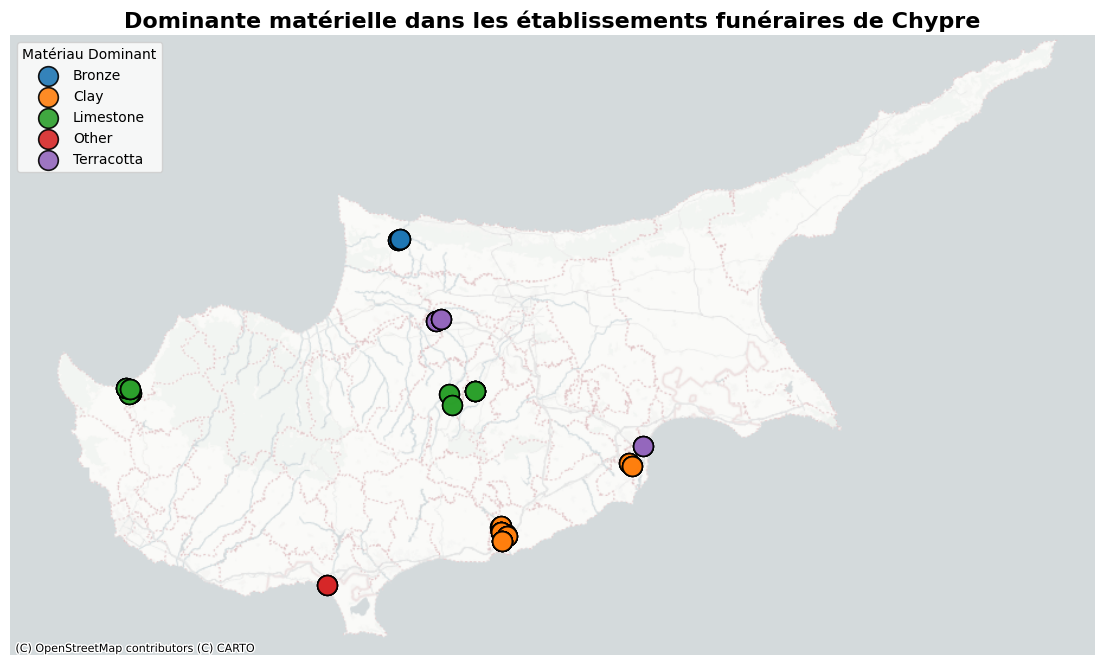

In [ ]:


if not isinstance(gdf_settlement, gpd.GeoDataFrame):
    if gdf_settlement['geometry'].dtype == object:
        gdf_settlement['geometry'] = gdf_settlement['geometry'].apply(wkt.loads)
    gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs="EPSG:4326")

gdf_sanctuaries = gdf_settlement[gdf_settlement['Type'].str.lower().isin(['cemetery', 'necropolis', 'tombs'])].to_crs(epsg=3857)

tous_les_materiaux = ["limestone", "marble", "terracotta", "clay", "stone", "gold", "bronze", "lead"]

def classifier_substance(text):
    t = str(text).lower()
    for mat in tous_les_materiaux:
        if mat in t:
            return mat.capitalize()
    return "Other"

gdf_inscriptions_webmercator['Mat_Substance'] = gdf_inscriptions_webmercator['Material'].apply(classifier_substance)

mode_mat = (gdf_inscriptions_webmercator.groupby(['Settlement_ID', 'Mat_Substance'])
            .size()
            .reset_index(name='count')
            .sort_values(['Settlement_ID', 'count'], ascending=[True, False])
            .drop_duplicates('Settlement_ID'))

gdf_map_sanct = gdf_sanctuaries.merge(
    mode_mat[['Settlement_ID', 'Mat_Substance']],
    left_on='ID', right_on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

try:
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)
except Exception as e:
    print(f"Erreur de chargement du fond de carte : {e}")
    ax.set_facecolor('#e0e0e0')

materiaux_presents = sorted(gdf_map_sanct['Mat_Substance'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {mat: colormap(i) for i, mat in enumerate(materiaux_presents)}

for mat in materiaux_presents:
    subset = gdf_map_sanct[gdf_map_sanct['Mat_Substance'] == mat]
    if not subset.empty:
        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=mapping_couleurs[mat],
            s=200,
            alpha=0.9,
            edgecolors='black',
            linewidth=1.2,
            label=mat,
            zorder=3
        )

ax.legend(title="Matériau Dominant", loc='upper left', frameon=True, fontsize=10)
ax.set_title("Dominante matérielle dans les établissements funéraires de Chypre", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()